Performing the EDA for Healthcare Providers

In [15]:
# prompt: import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path='/content/Healthcare Providers.csv (1).zip'
df=pd.read_csv(file_path)
print(df.head())
#data Cleaning
print("\nMissing values in each column")
print(df.isnull().sum())
df = df.drop_duplicates()
df = df.drop_duplicates()
print("\nSummary statistics of numerical columns after cleaning.")
print(df.describe())

     index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                 UPADHYAYULA                  SATYASREE   
1                                       JONES                      WENDY   
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   

  Middle Initial of the Provider Credentials of the Provider  \
0                            NaN                        M.D.   
1                              P                        M.D.   
2                              W                         DPM   
3                     

 histograms, scatter plots and a heatmap for the numerical columns in a dataframe.chart (1).png

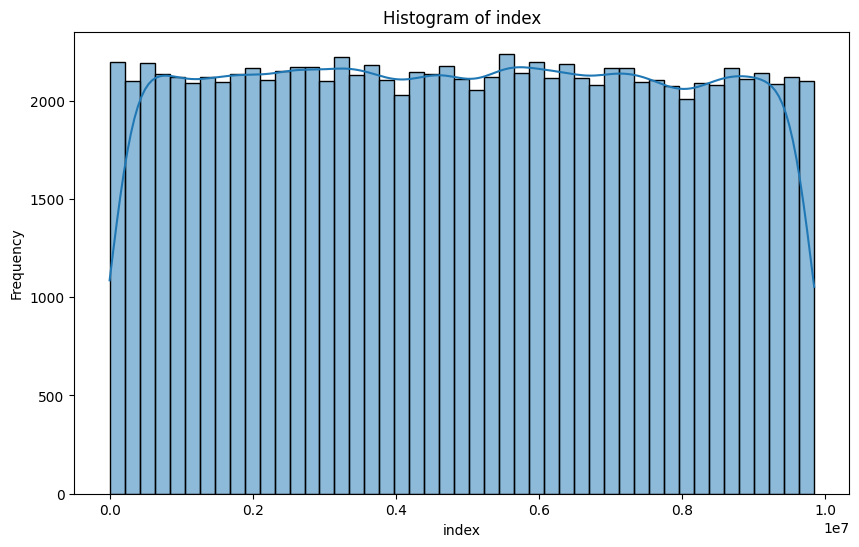

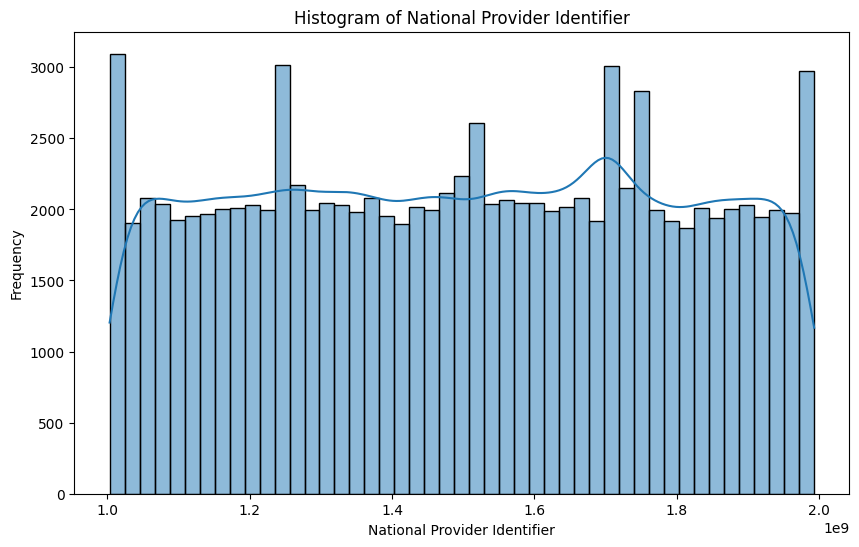

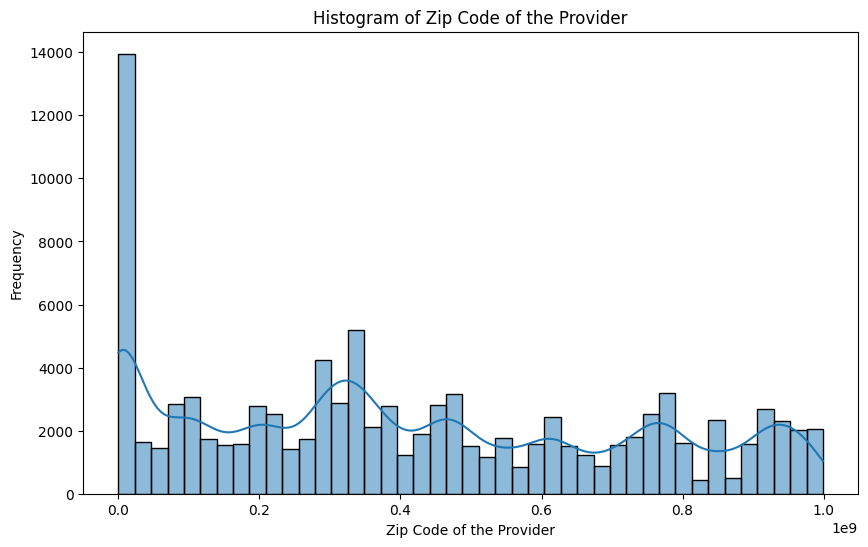

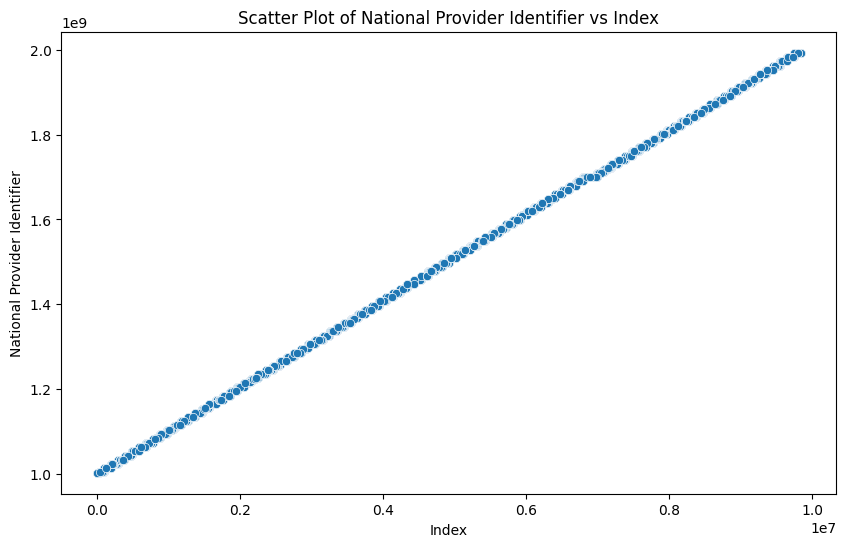

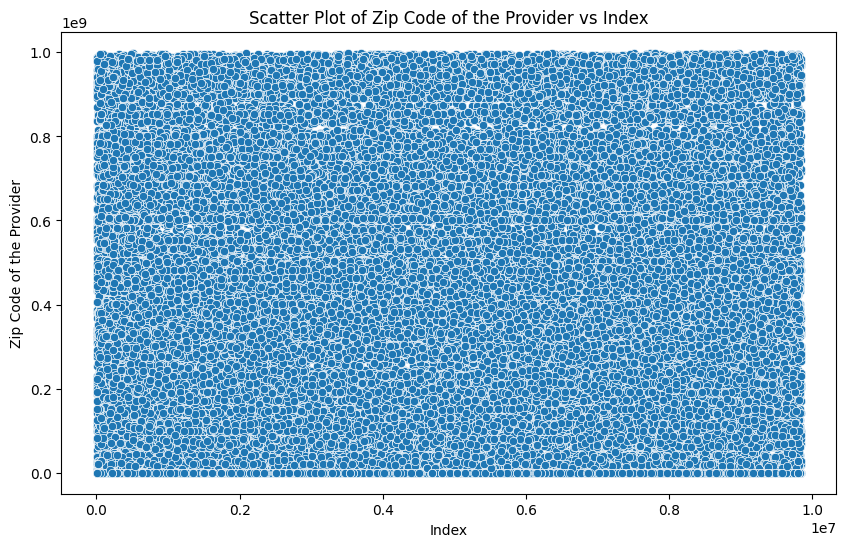

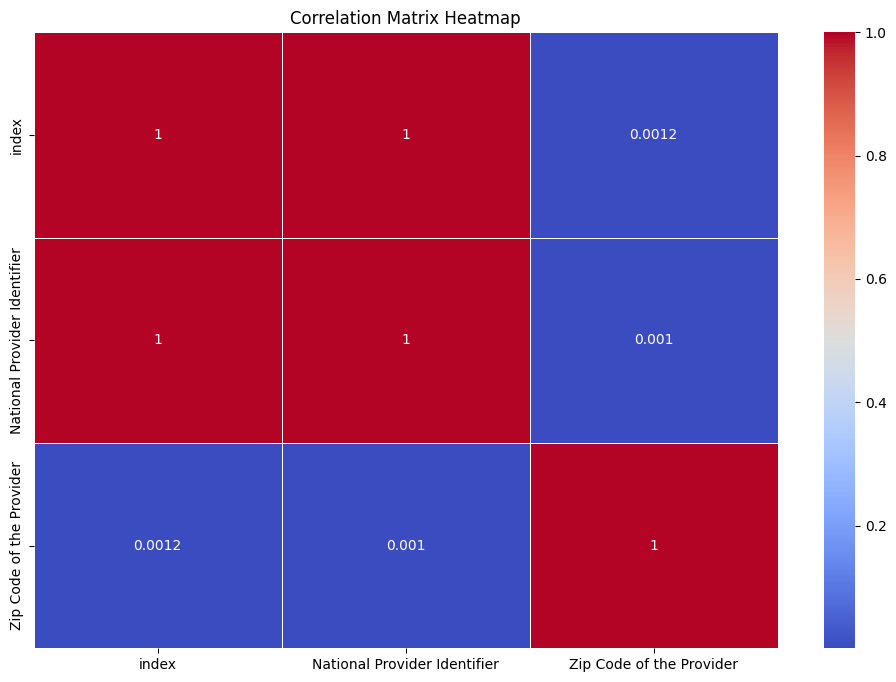

In [3]:
# Create histograms for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title('Histogram of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Create scatter plots for numerical columns
for column in numerical_columns:
    if column != 'index':  # Skip the index column
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df['index'], y=df[column])
        plt.title('Scatter Plot of ' + column + ' vs Index')
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.show()

# Create a heatmap for the correlation matrix of numerical columns
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

 UNIVARIATE ANALYSIS:The Histogram, Box Plot, and Density Plot for the top 30 numerical columns:

Number of Services
Number of Medicare Beneficiaries
Average Medicare Allowed Amount

<ipython-input-6-6091b6237e1b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df[column] = pd.to_numeric(selected_df[column], errors='coerce')


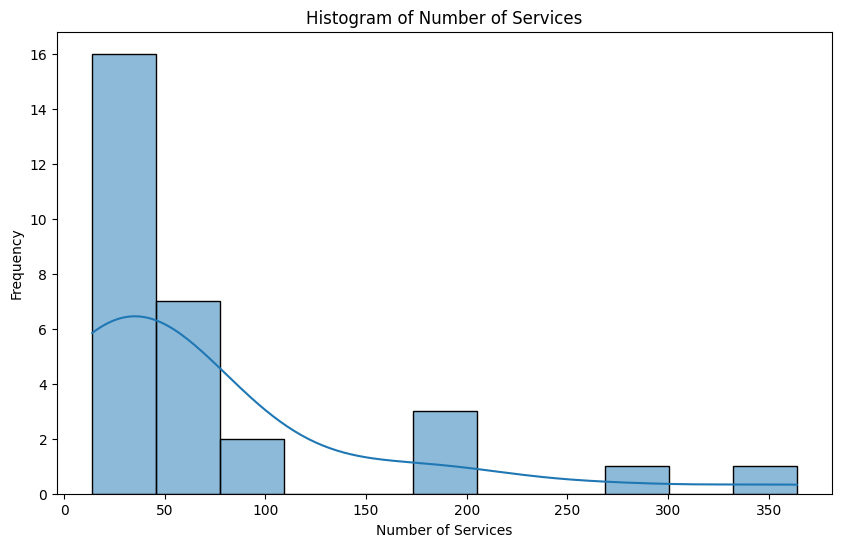

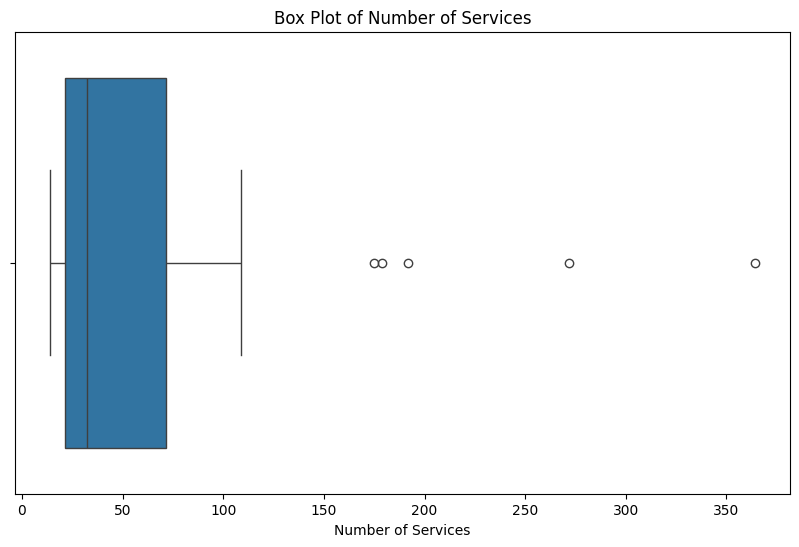

<ipython-input-6-6091b6237e1b>:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_df[column], shade=True)


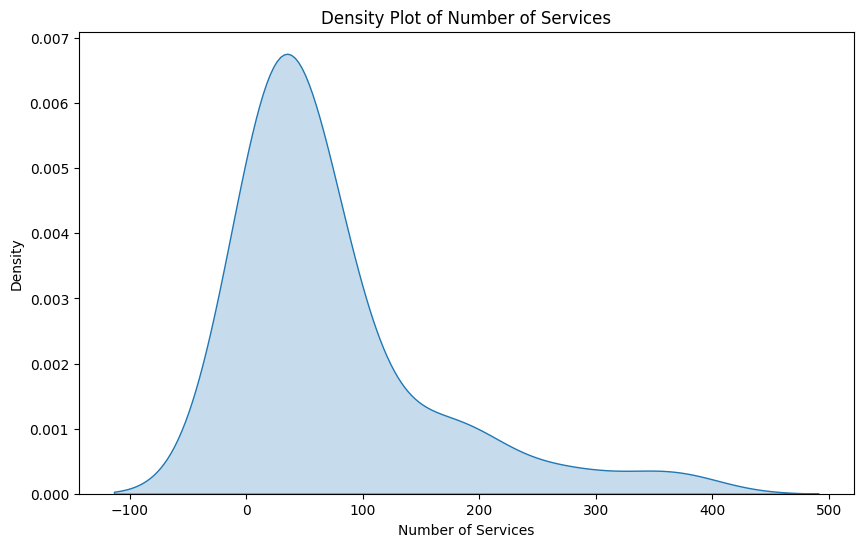

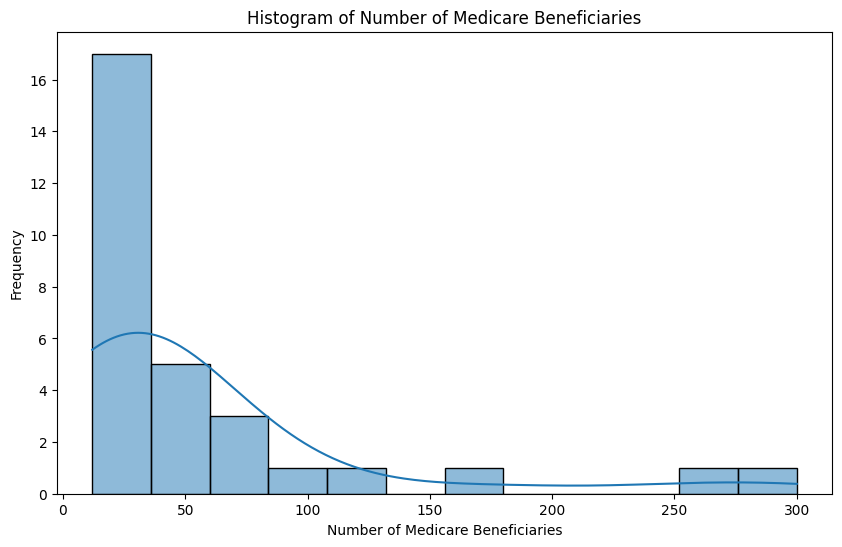

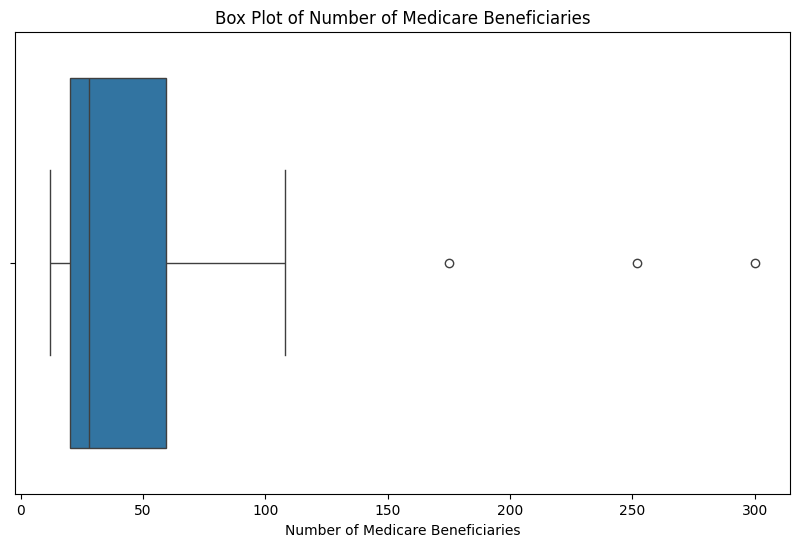

<ipython-input-6-6091b6237e1b>:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_df[column], shade=True)


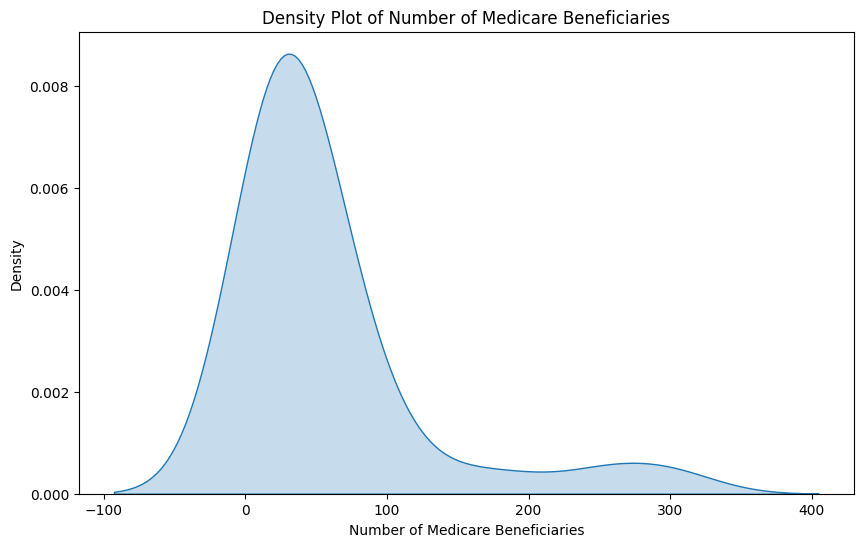

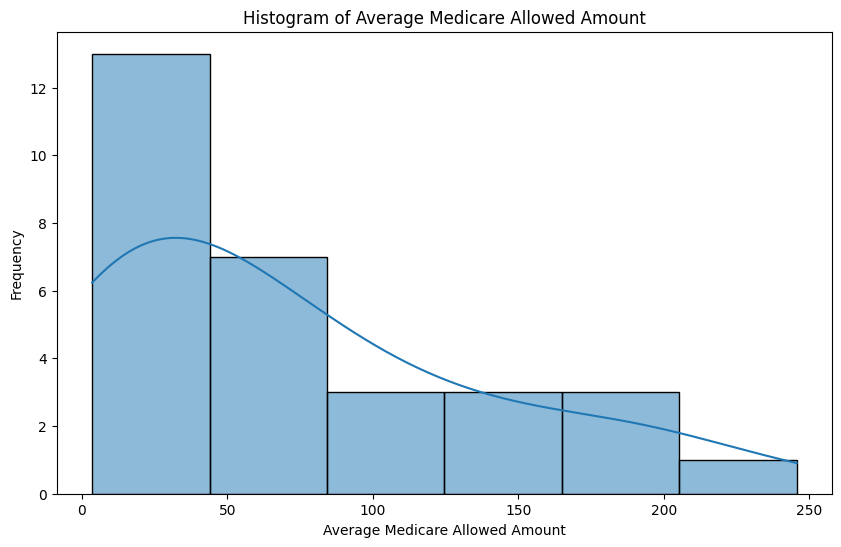

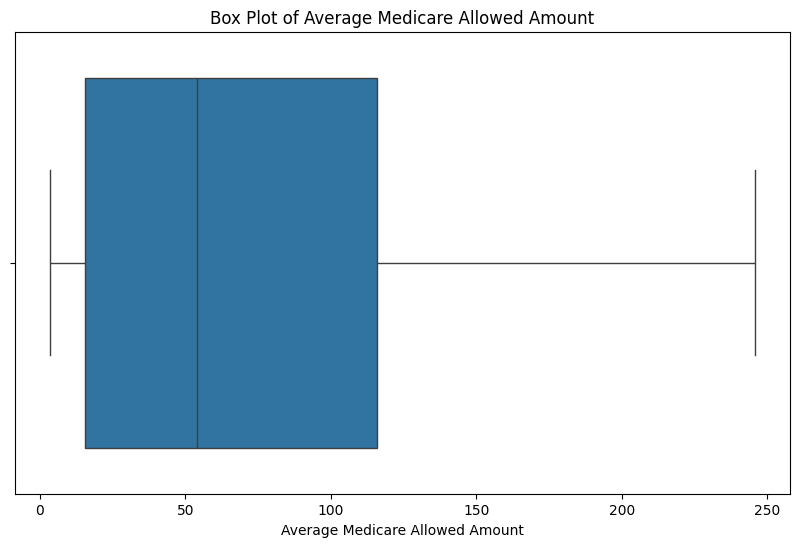

<ipython-input-6-6091b6237e1b>:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_df[column], shade=True)


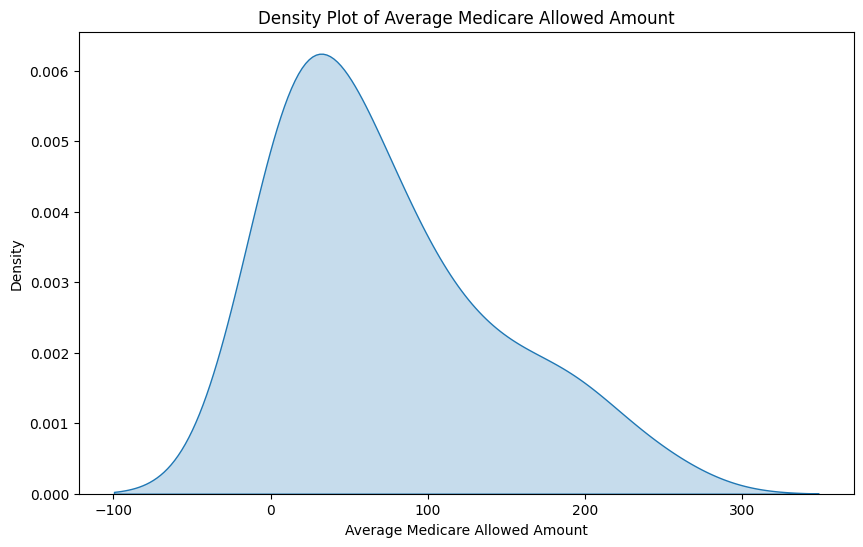

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Healthcare Providers.csv (1).zip'
df = pd.read_csv(file_path)

# Select the top 30 rows
selected_df = df.head(30)

# Convert relevant columns to numeric, coercing errors to NaN
selected_columns = ['Number of Services', 'Number of Medicare Beneficiaries', 'Average Medicare Allowed Amount']
for column in selected_columns:
    selected_df[column] = pd.to_numeric(selected_df[column], errors='coerce')

# Drop rows with NaN values in the selected columns
cleaned_df = selected_df.dropna(subset=selected_columns)

# Plot the visualizations for the selected columns
for column in selected_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(cleaned_df[column], kde=True)
    plt.title('Histogram of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cleaned_df[column])
    plt.title('Box Plot of ' + column)
    plt.xlabel(column)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.kdeplot(cleaned_df[column], shade=True)
    plt.title('Density Plot of ' + column)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

Univariate analysis for categorical columns

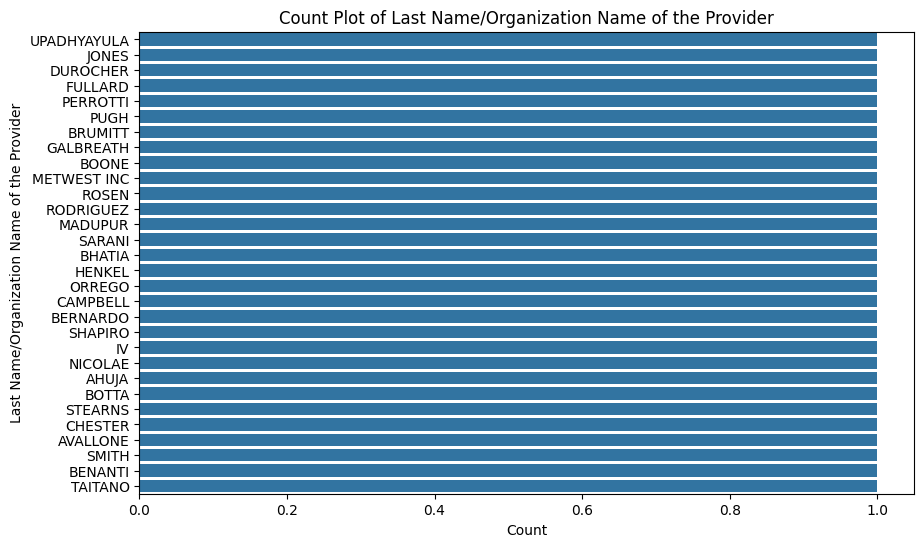

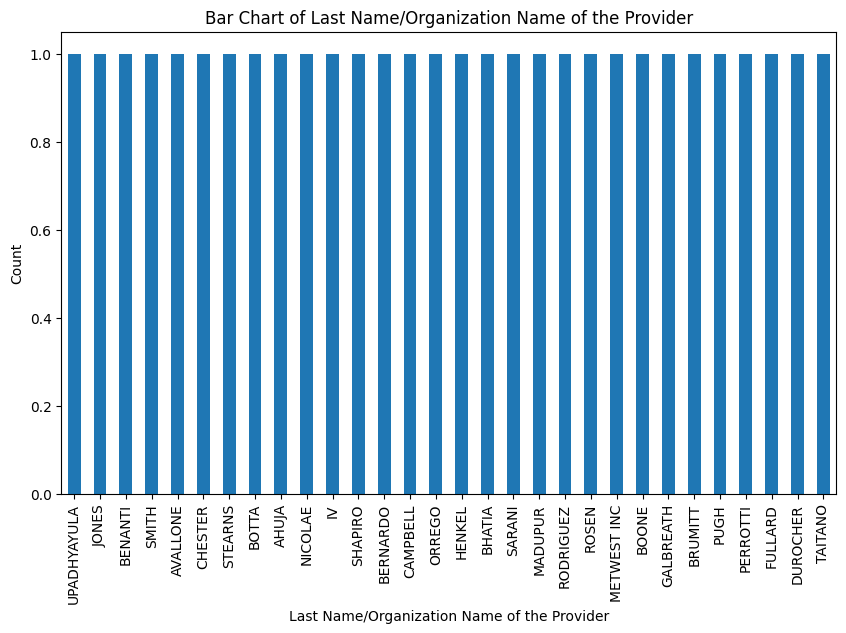

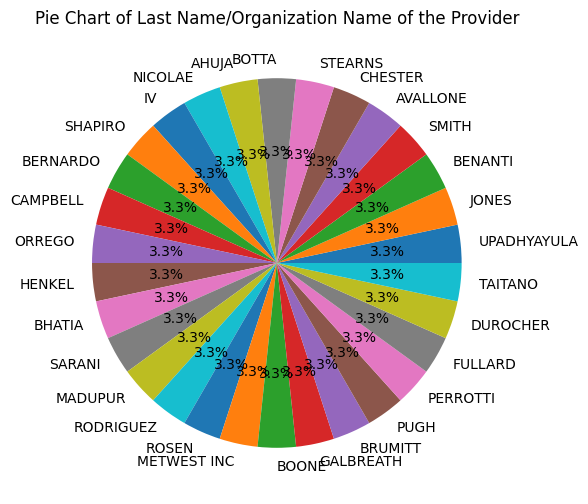

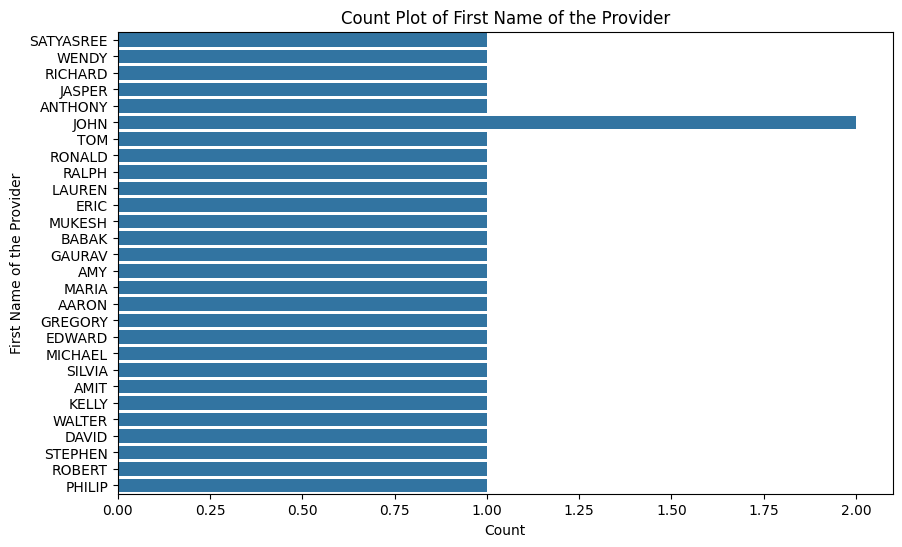

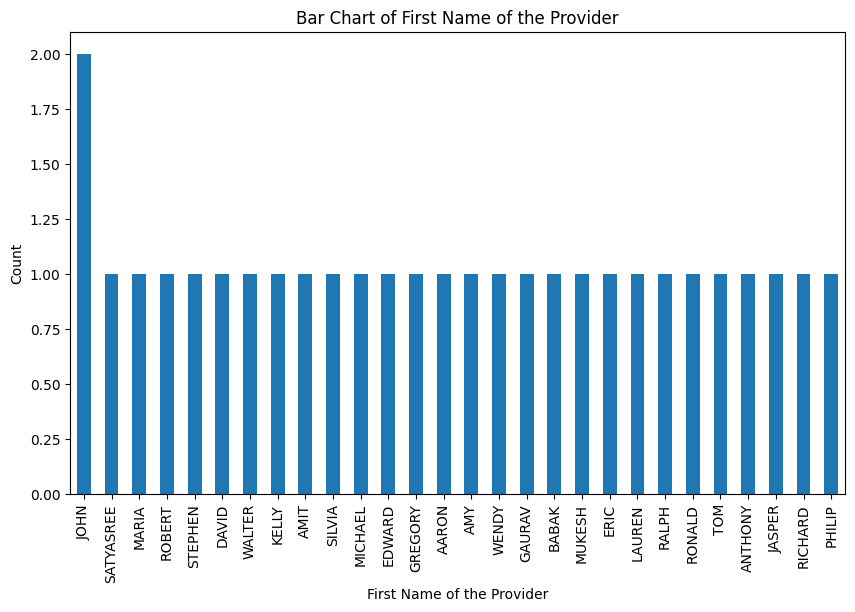

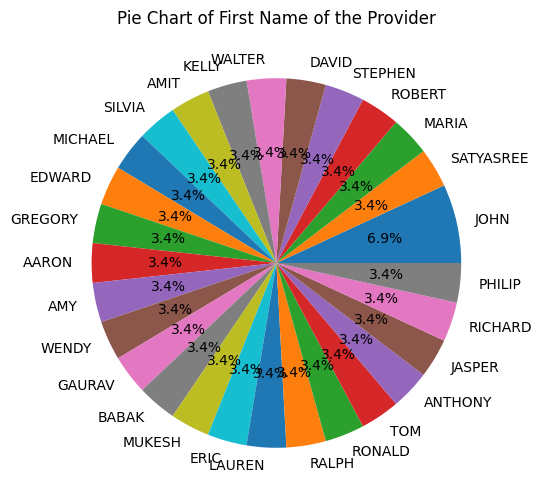

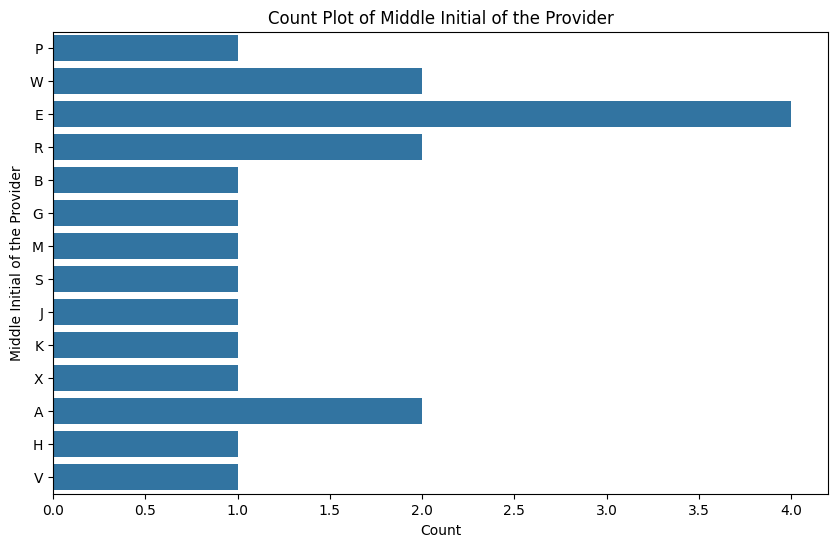

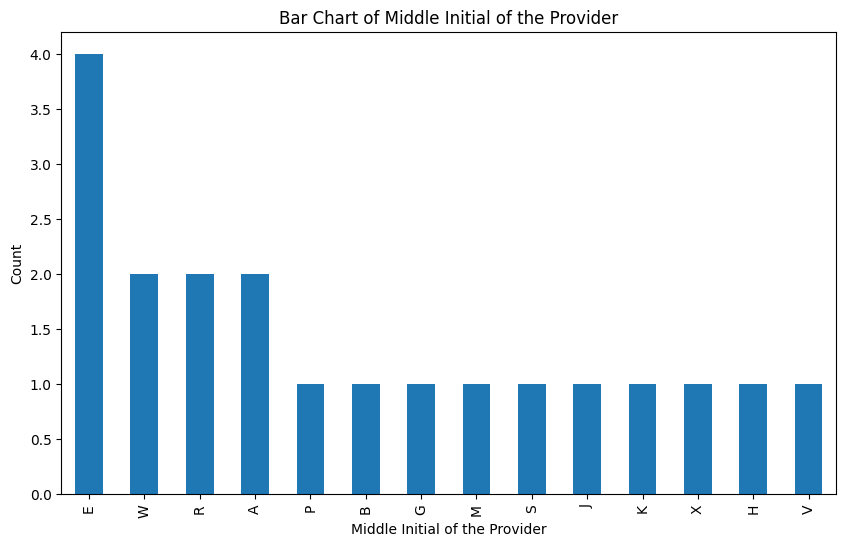

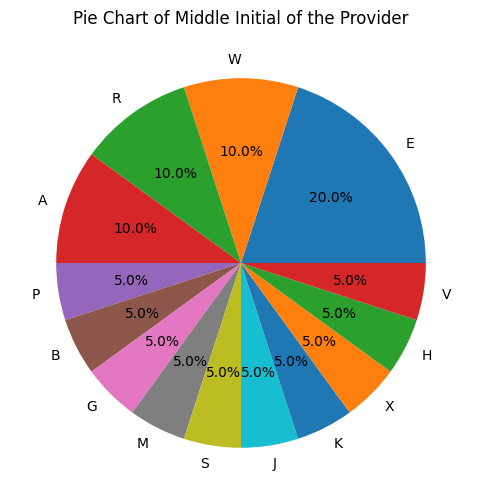

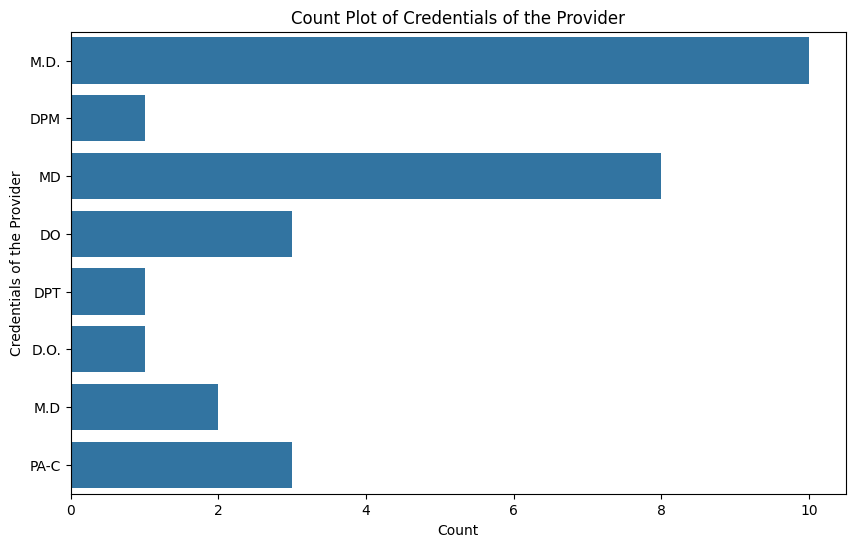

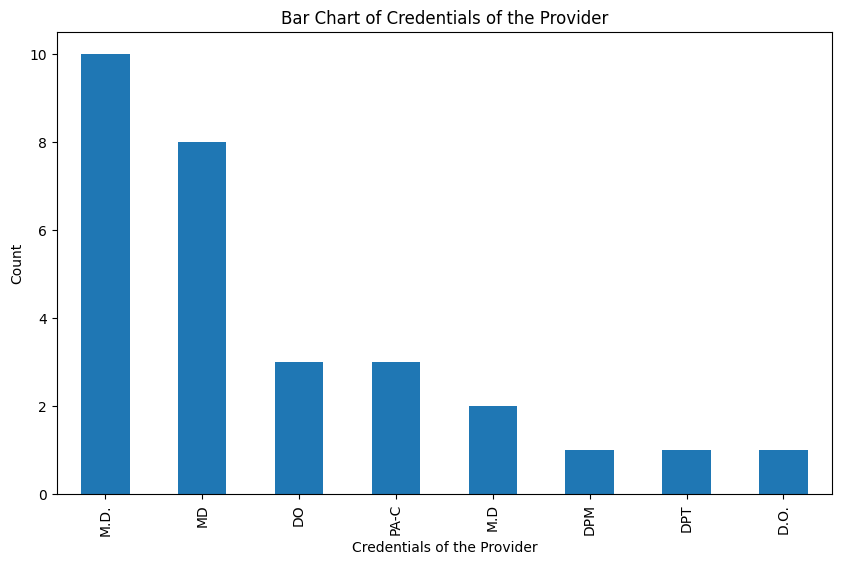

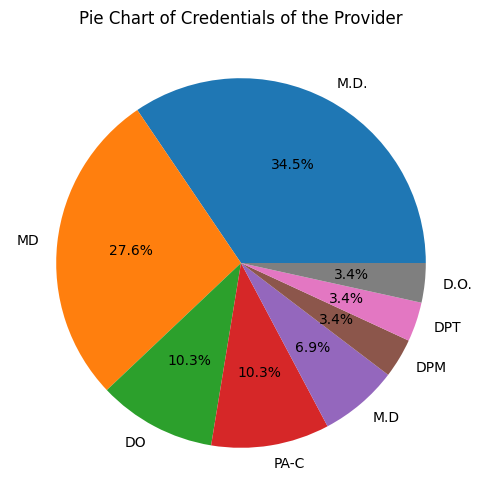

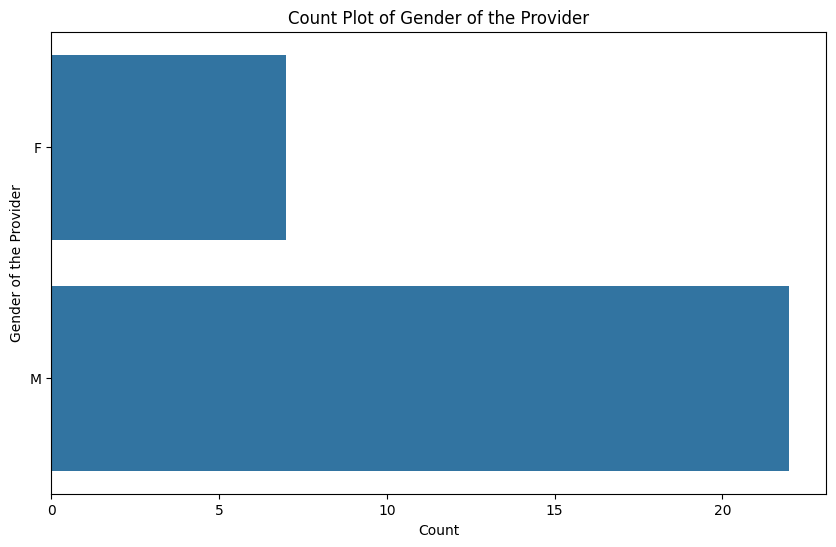

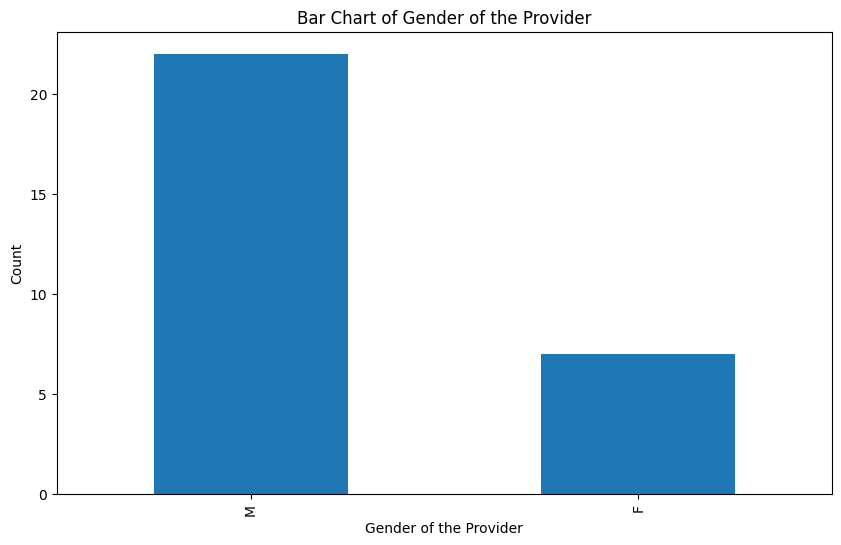

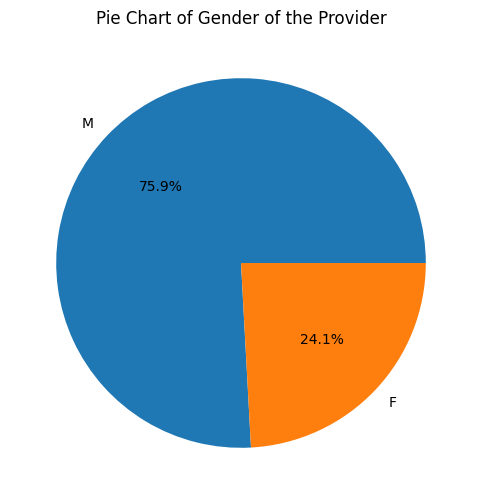

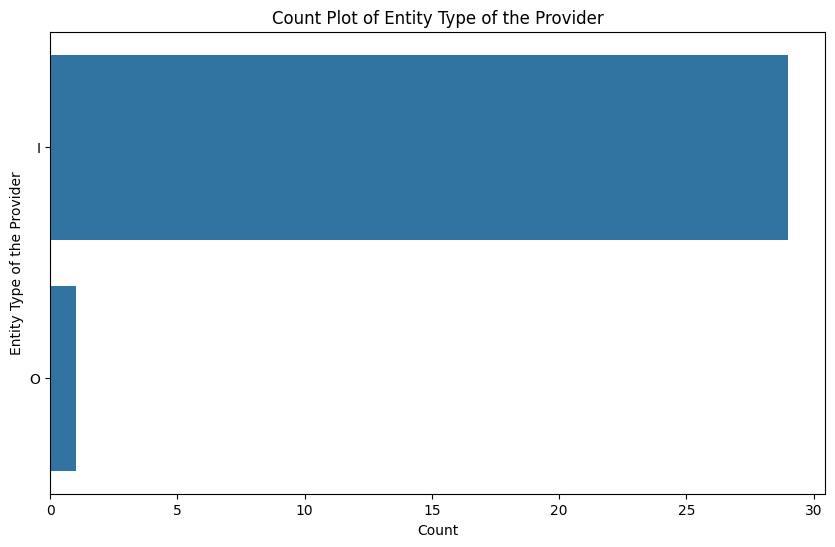

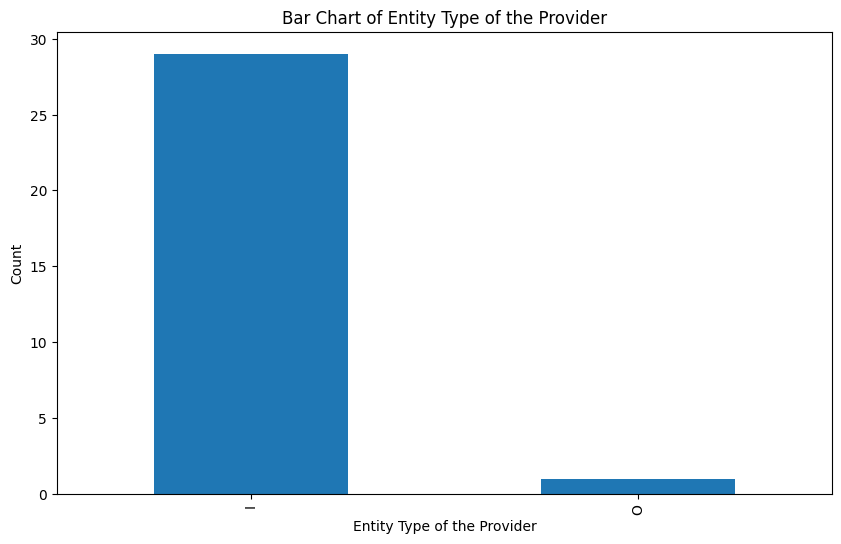

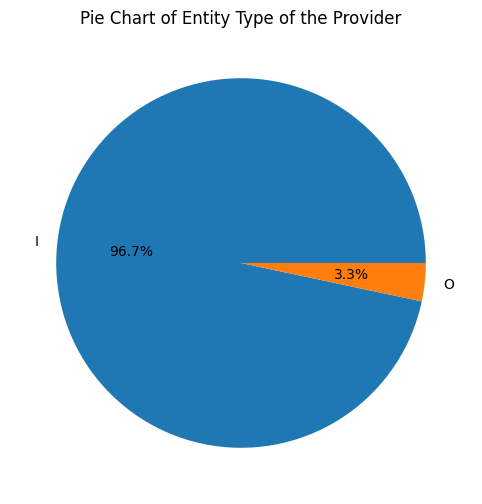

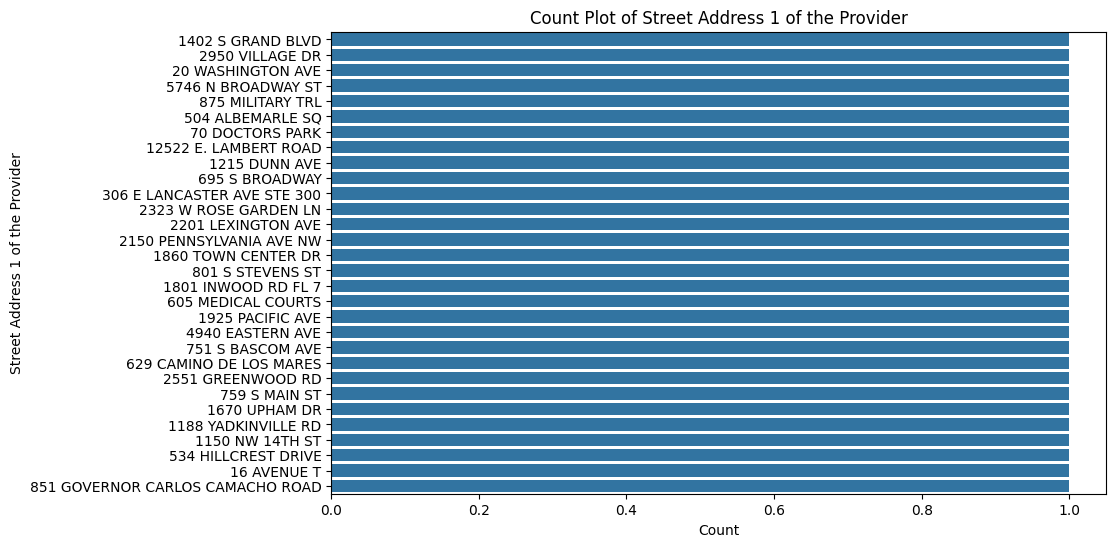

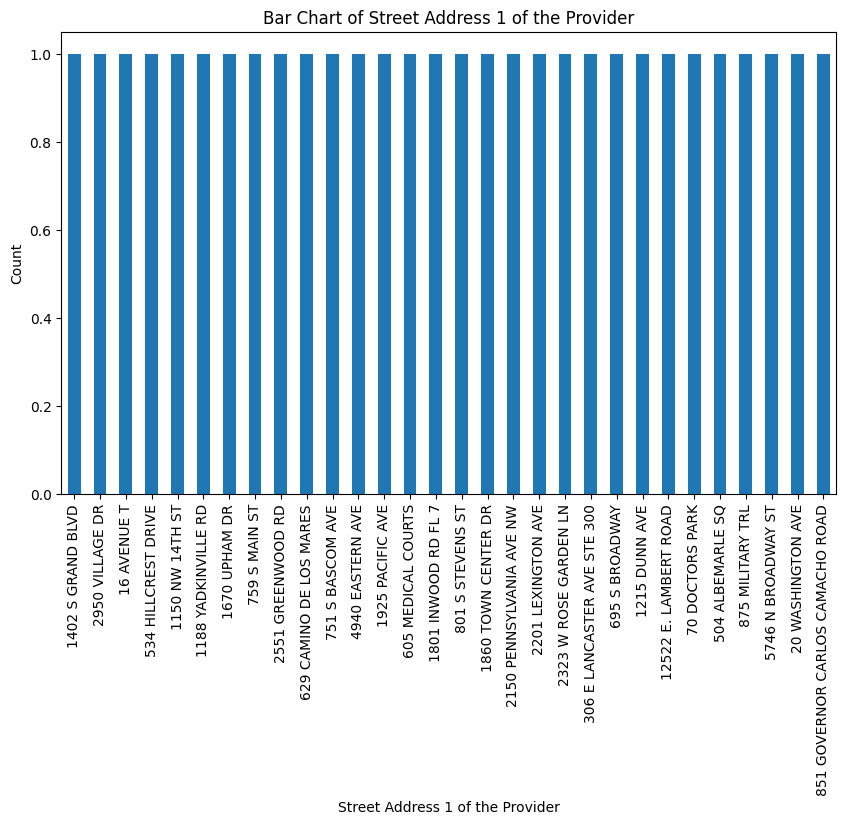

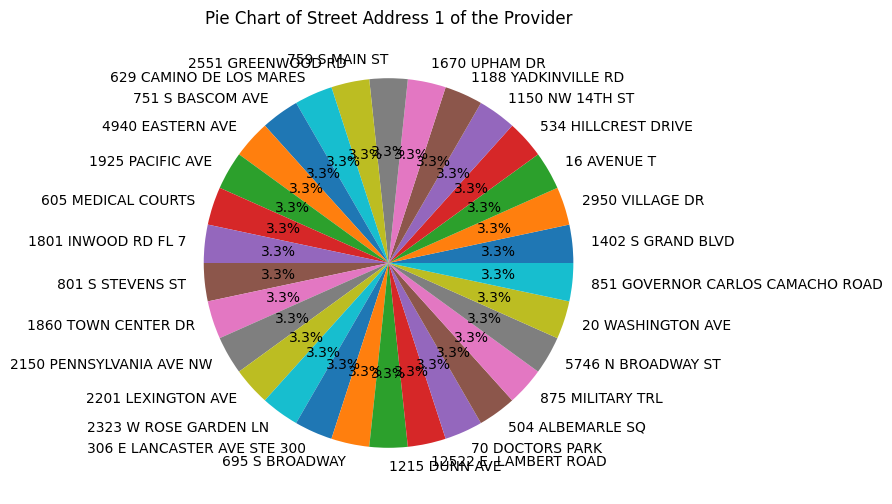

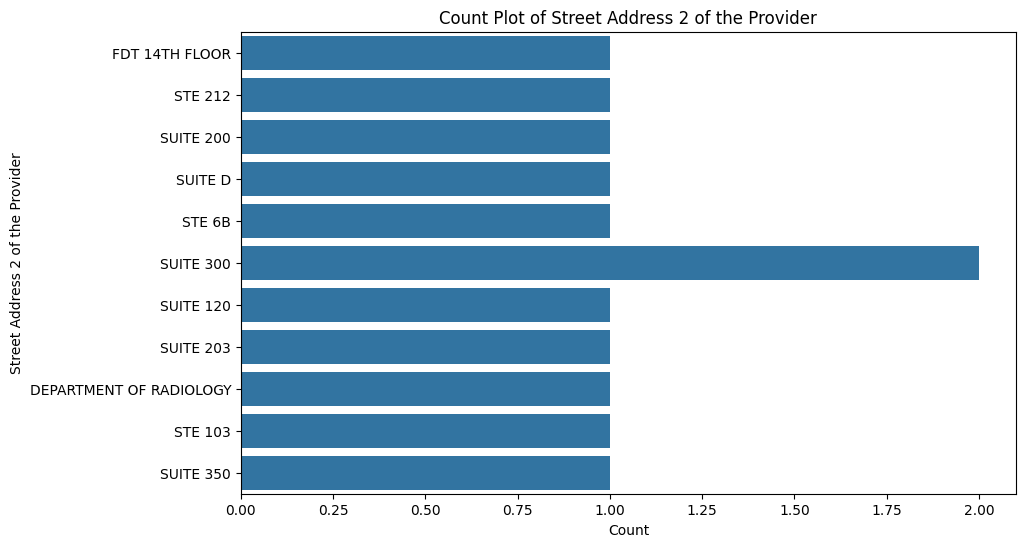

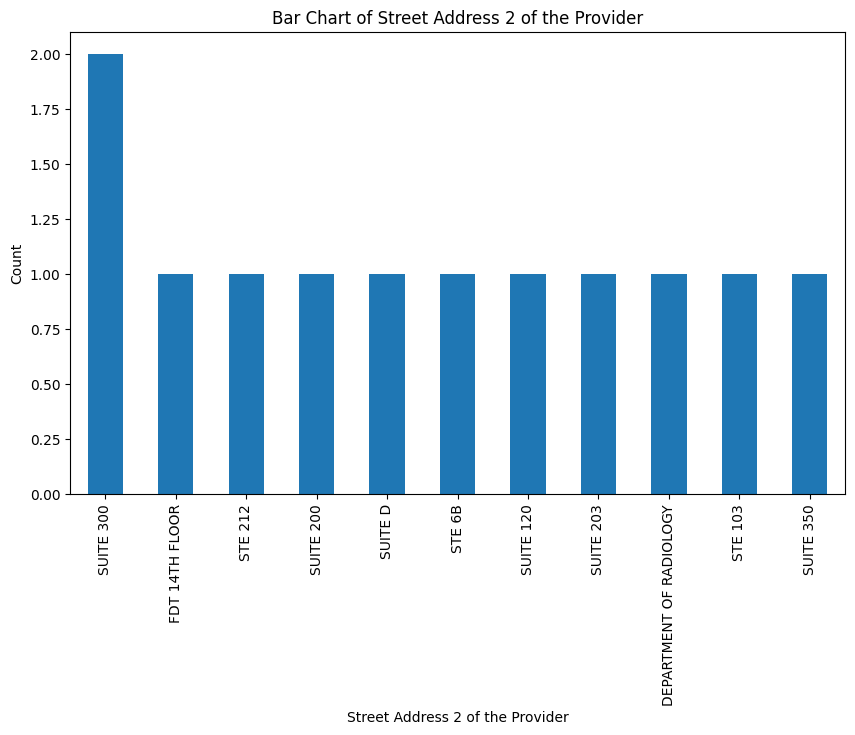

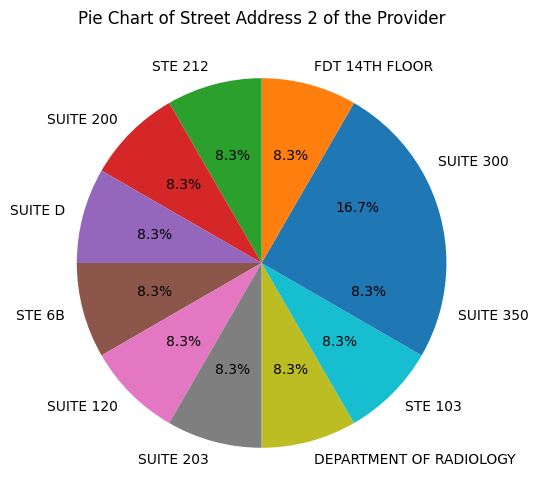

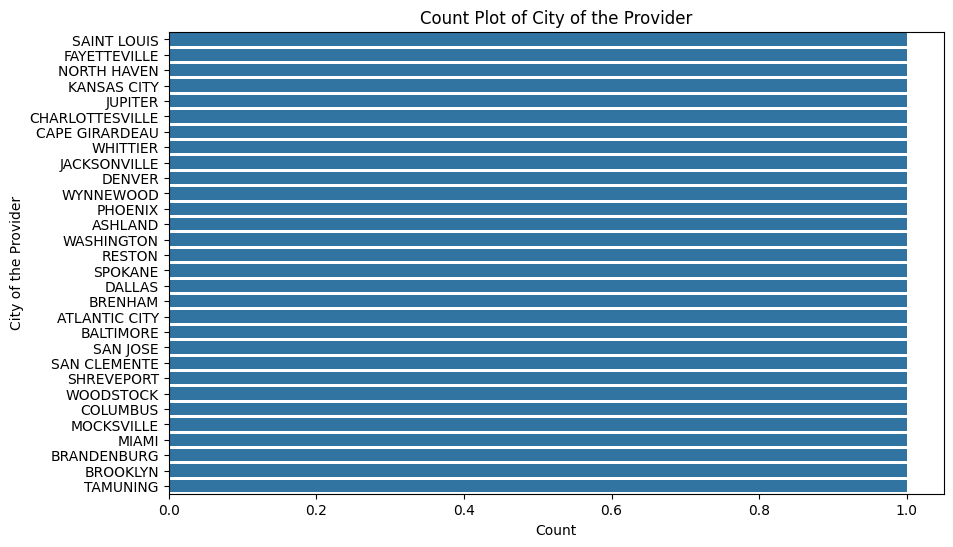

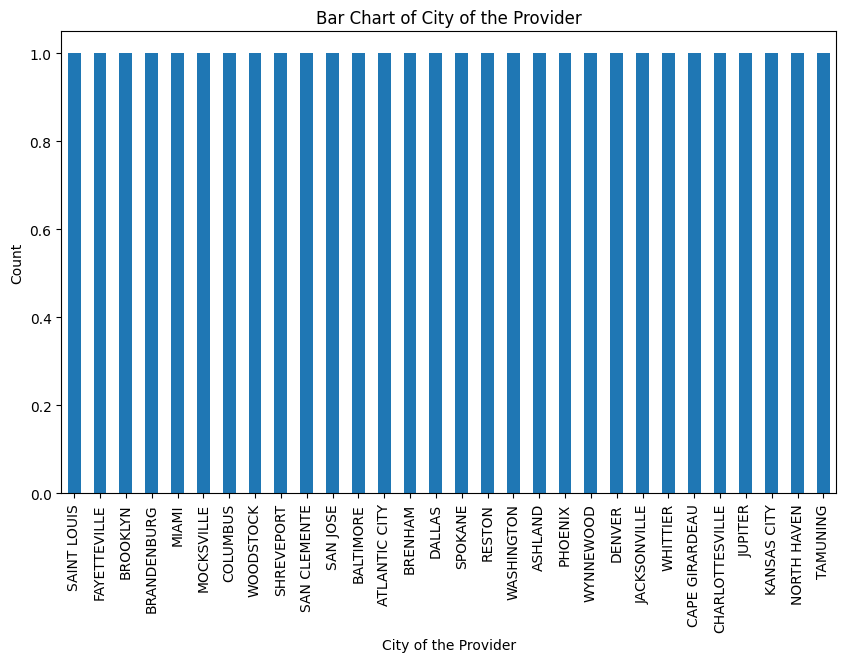

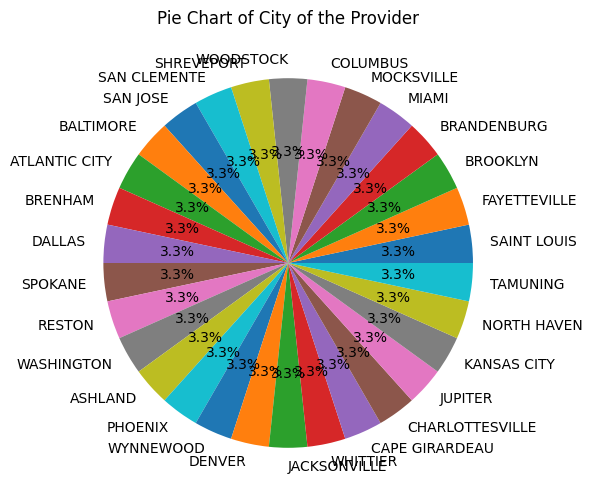

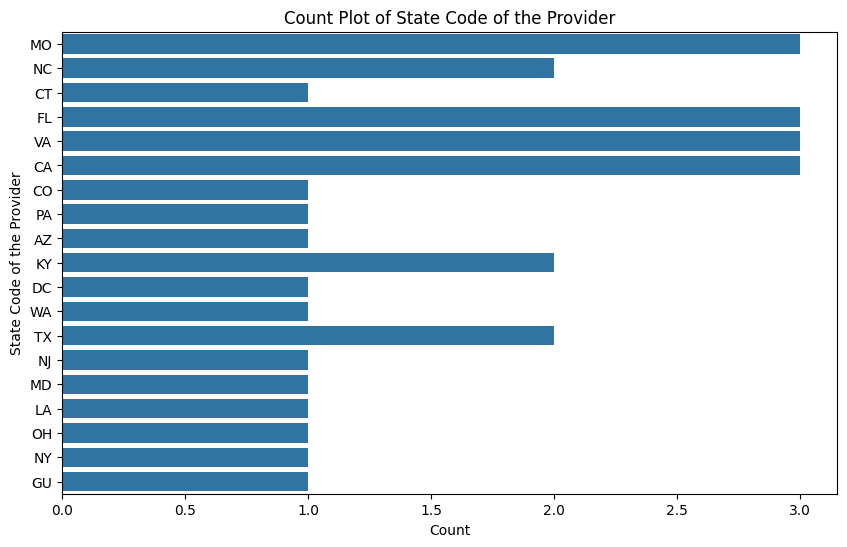

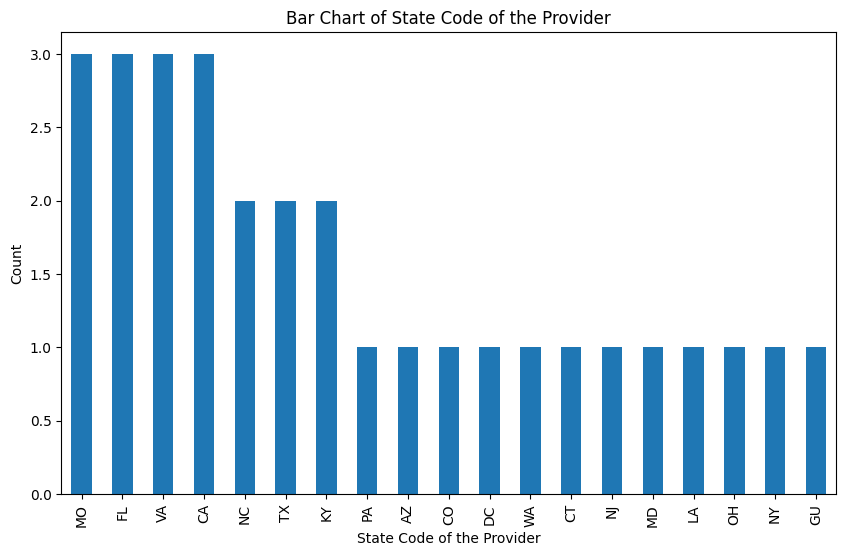

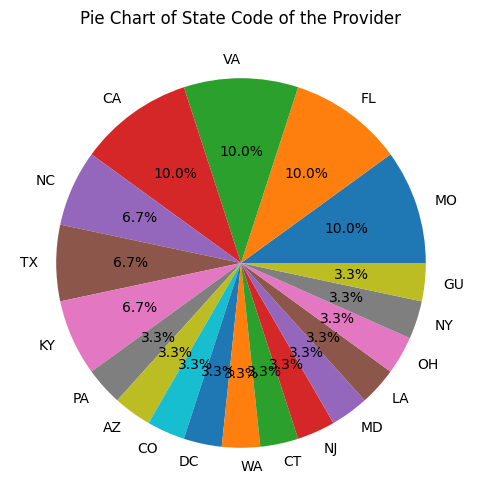

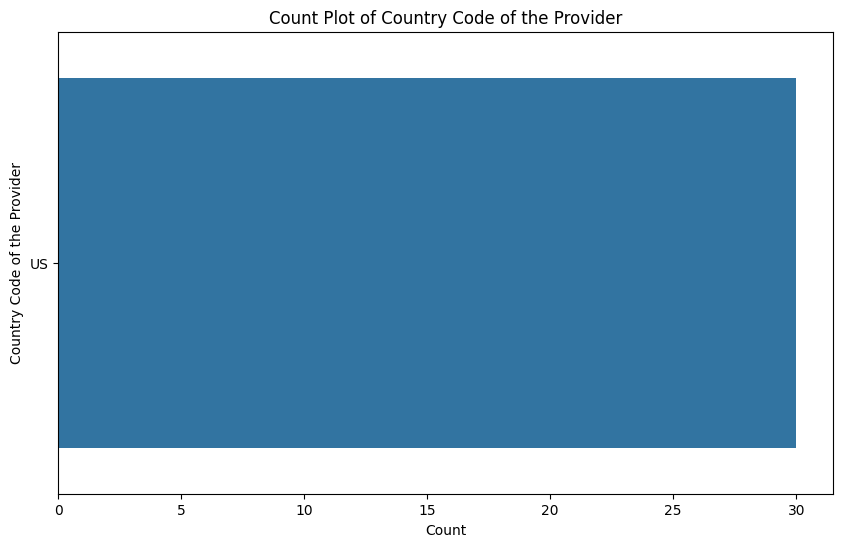

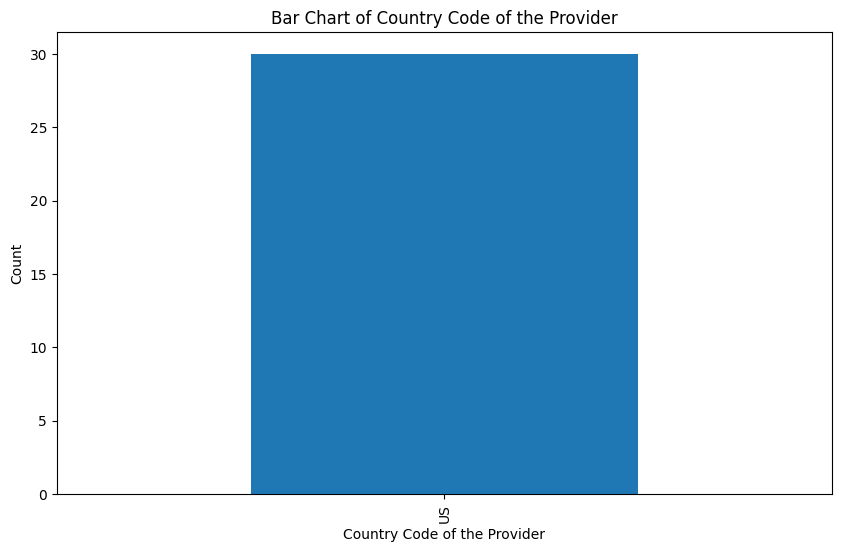

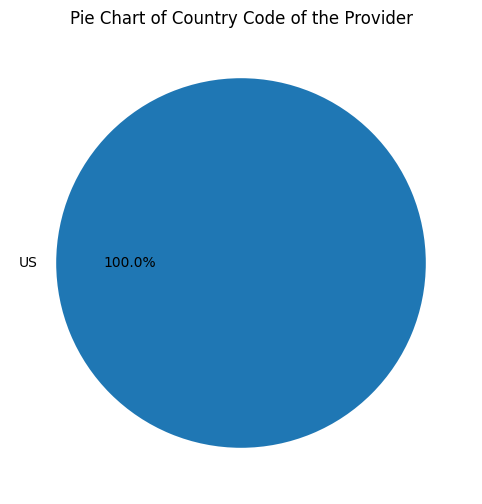

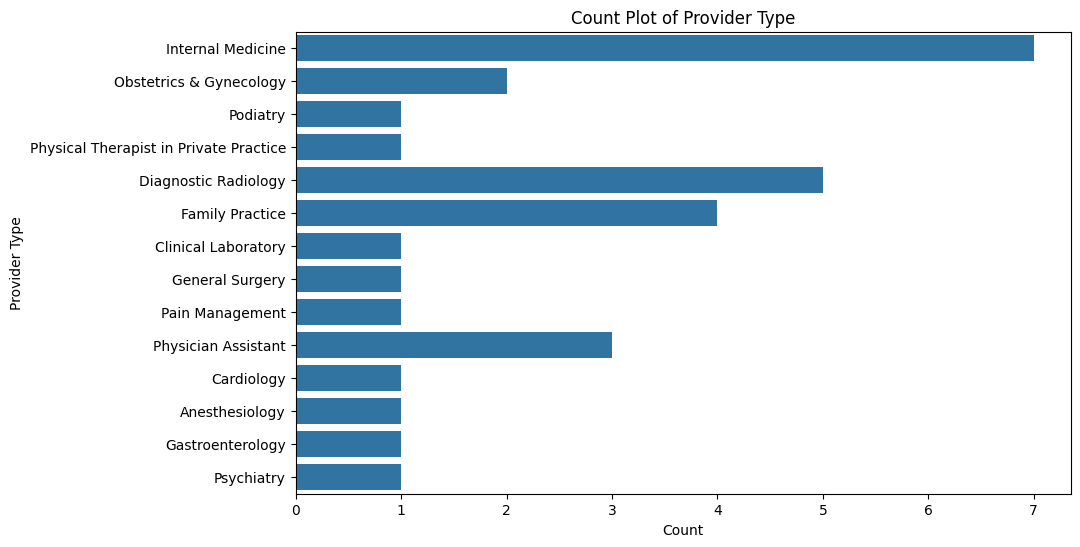

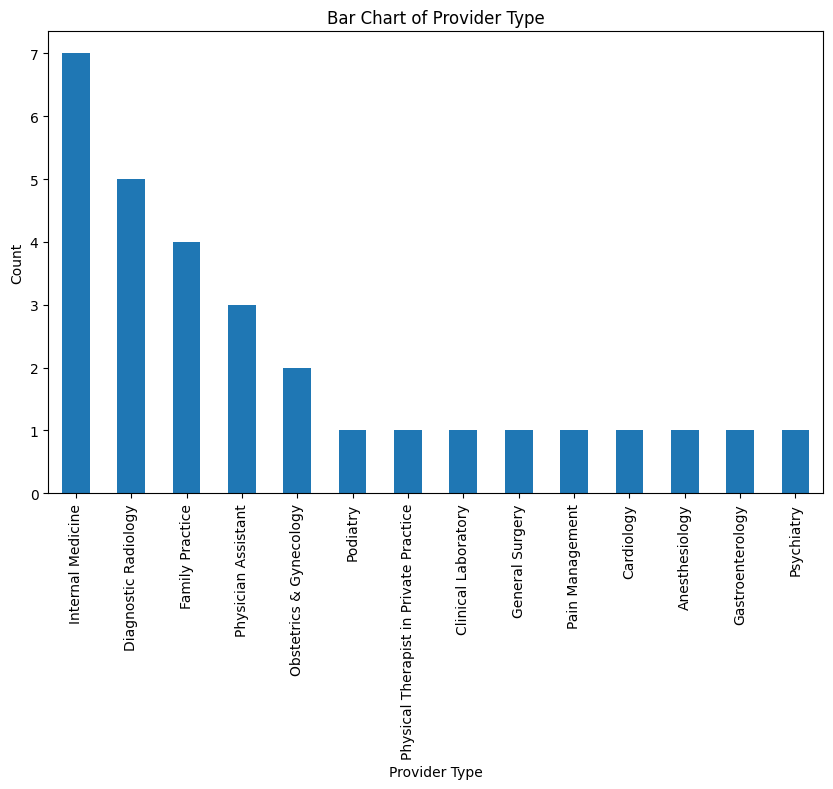

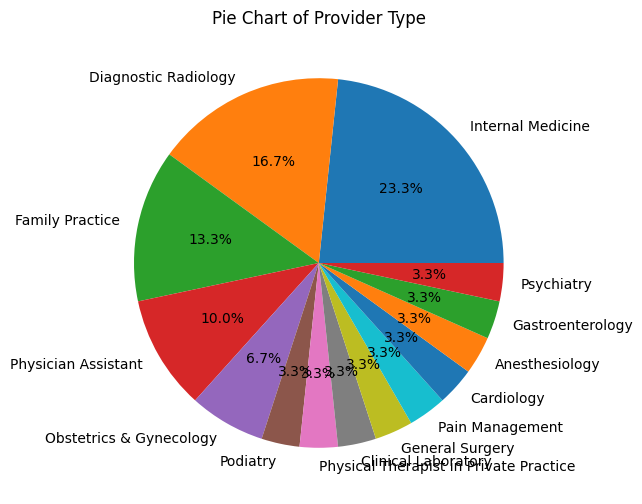

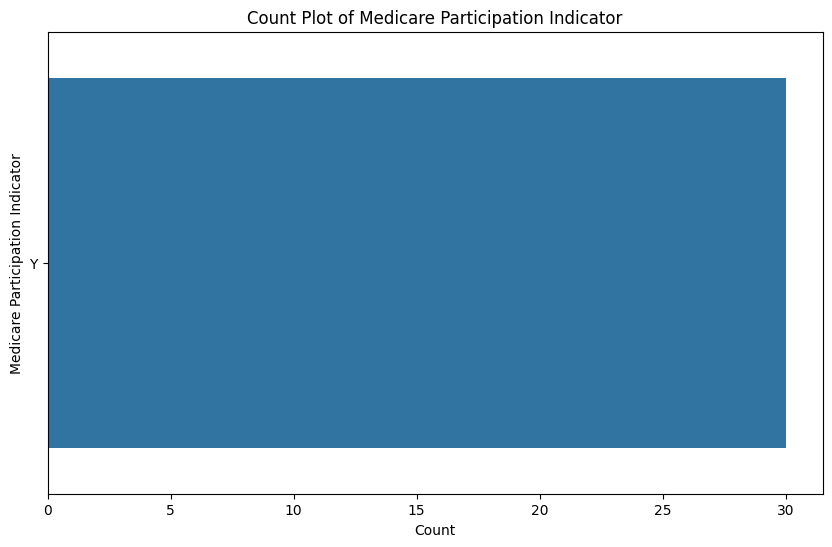

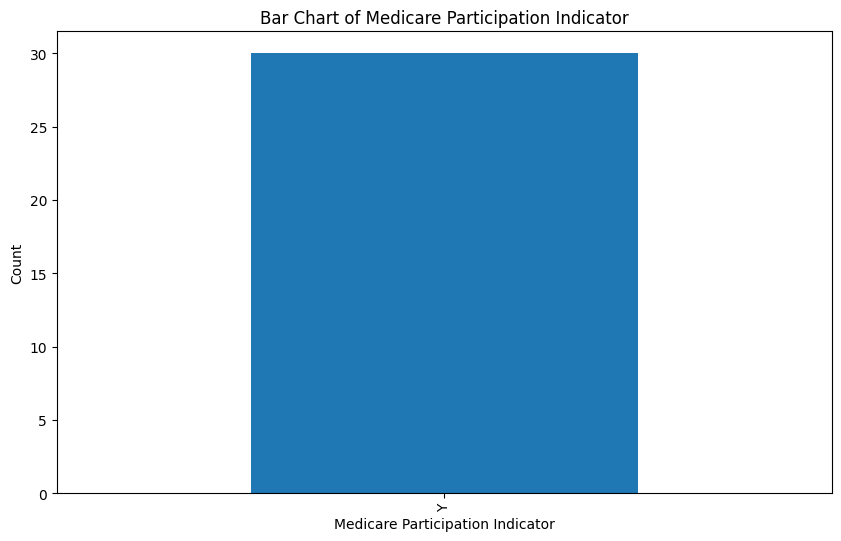

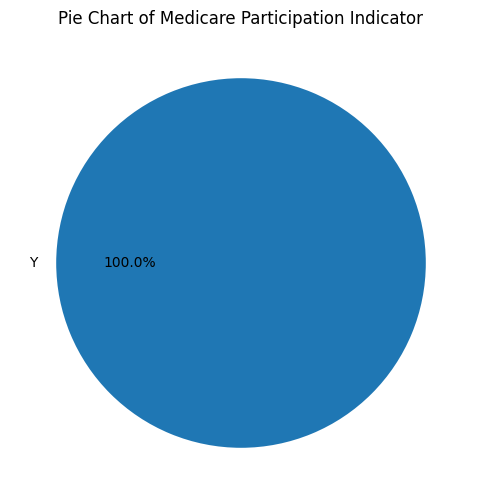

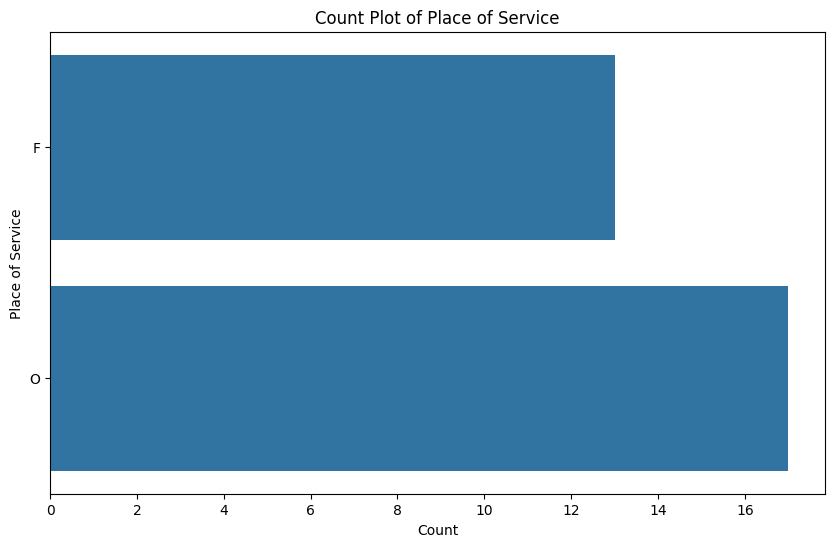

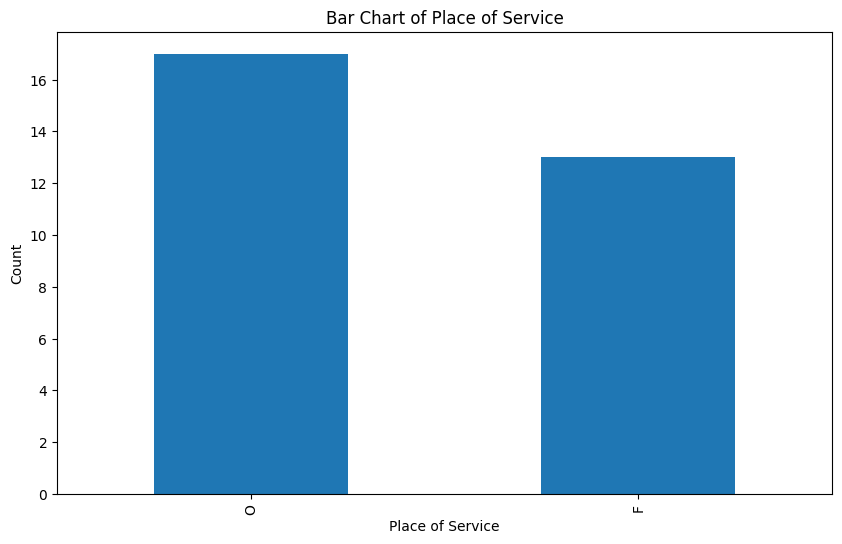

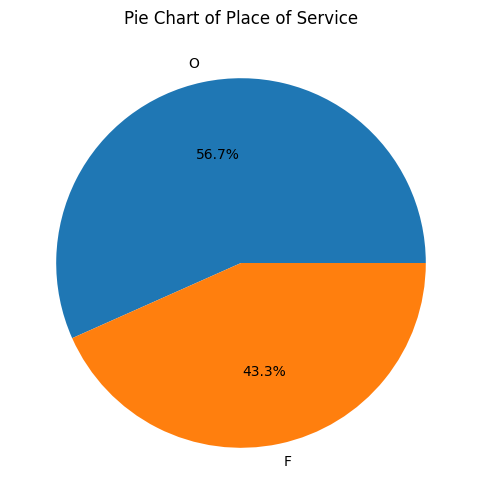

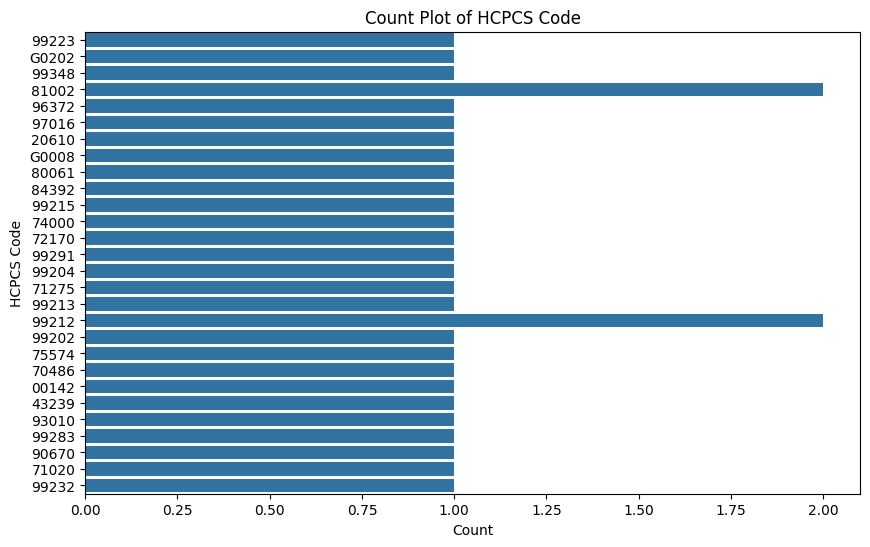

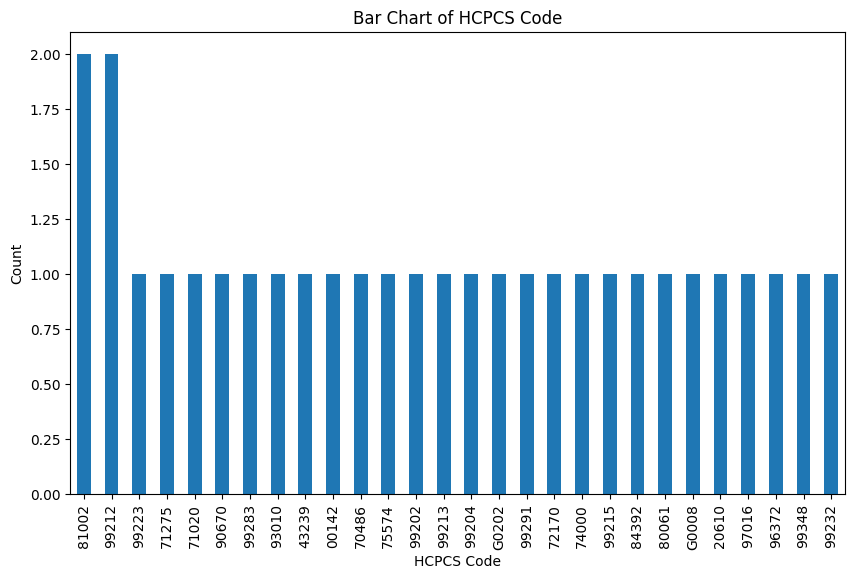

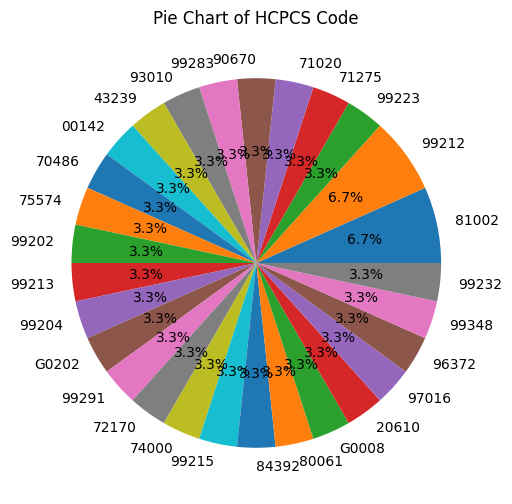

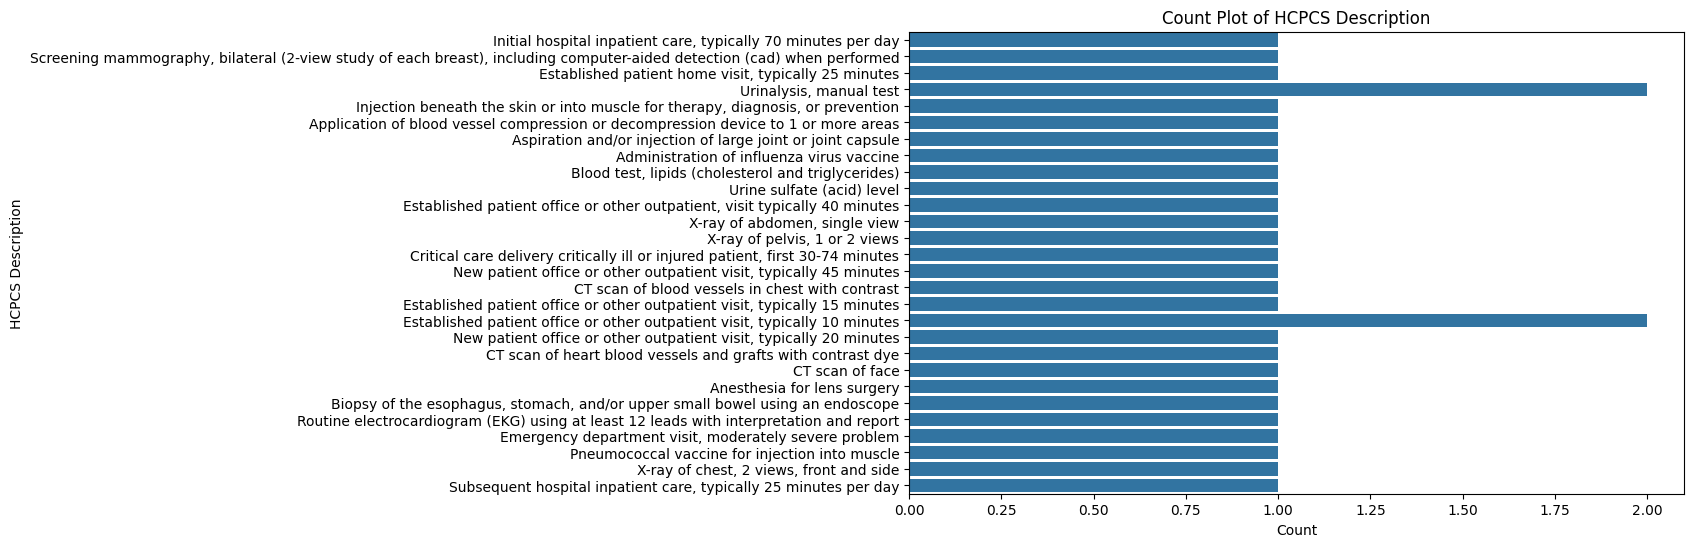

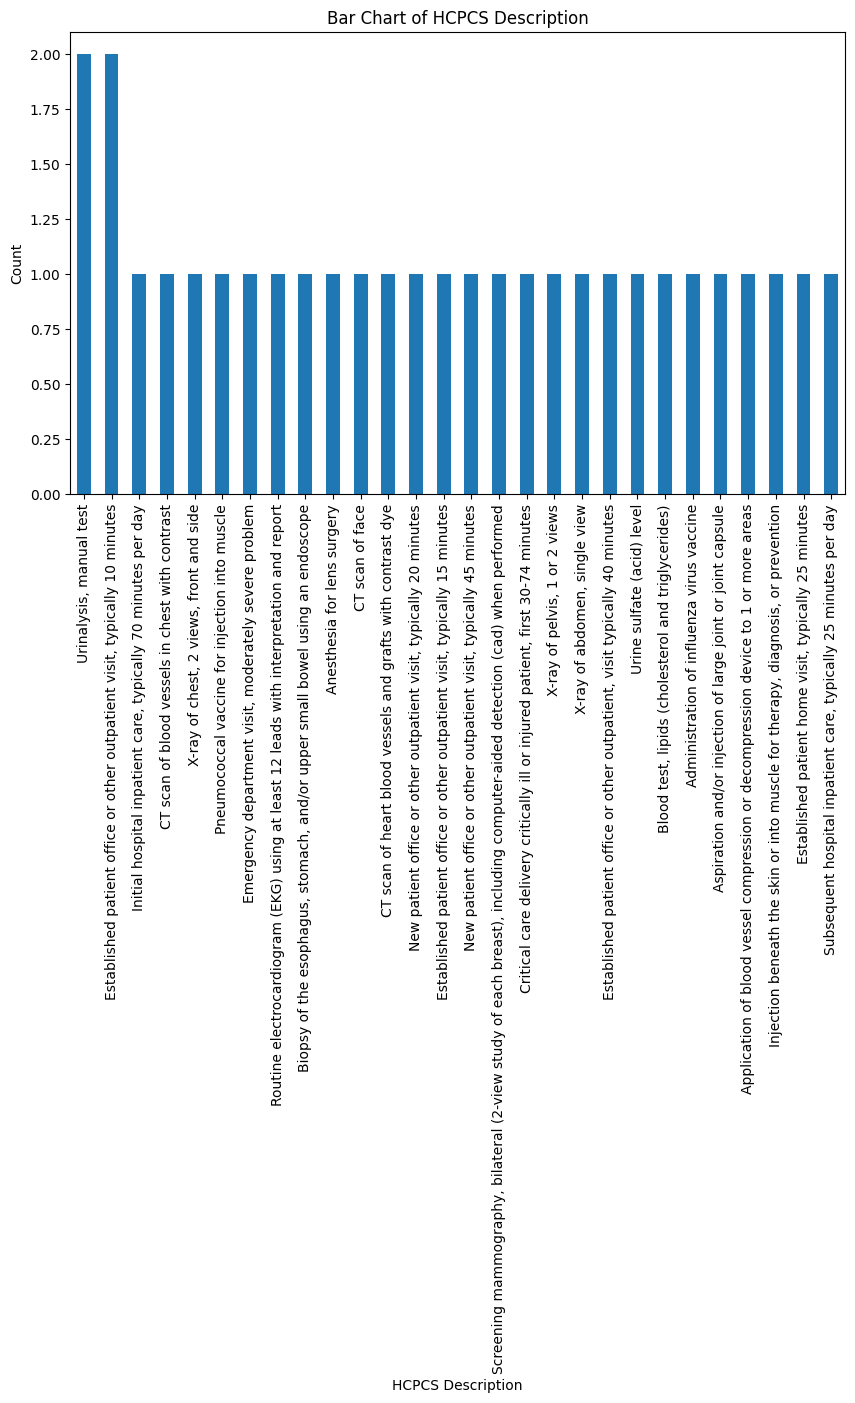

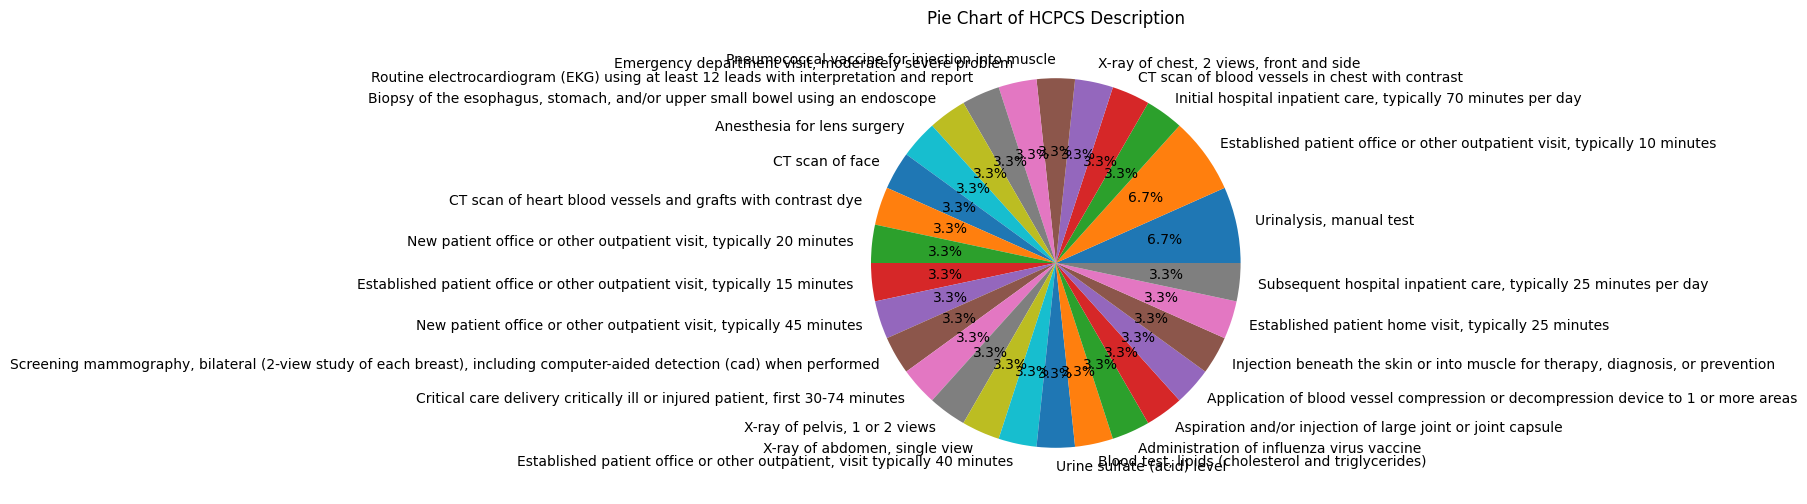

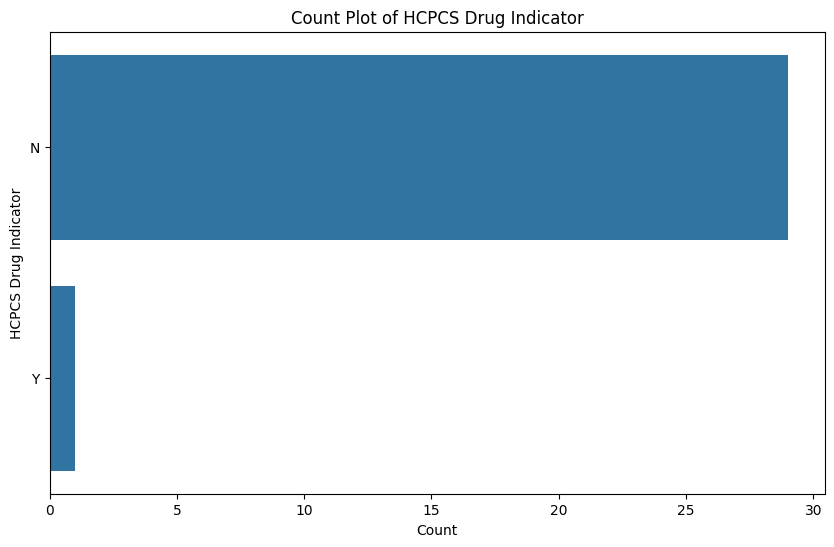

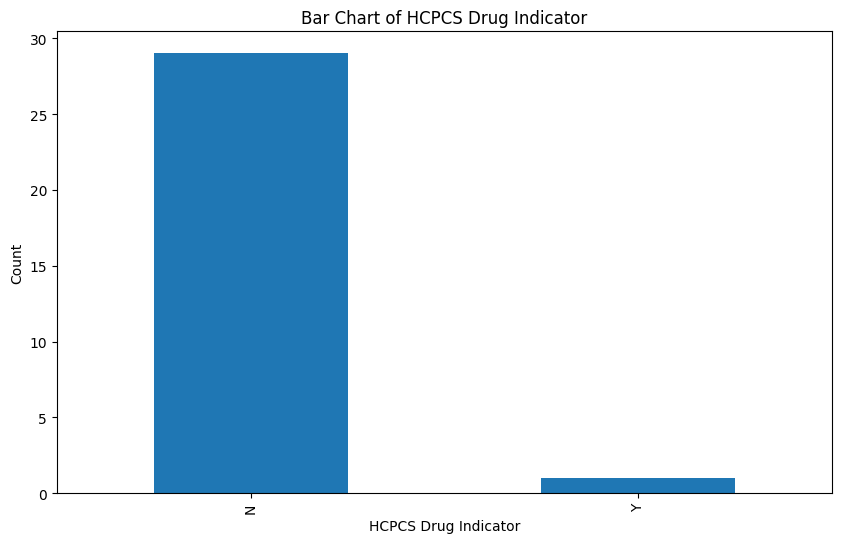

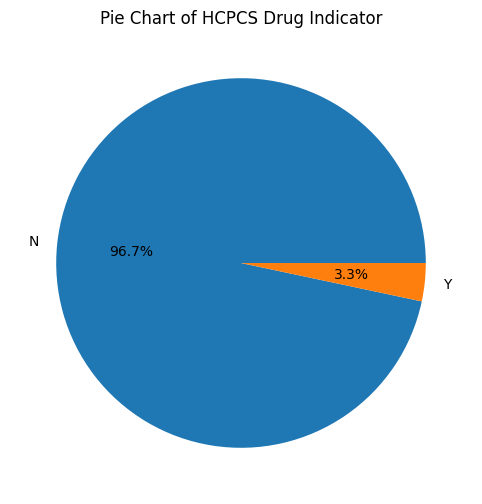

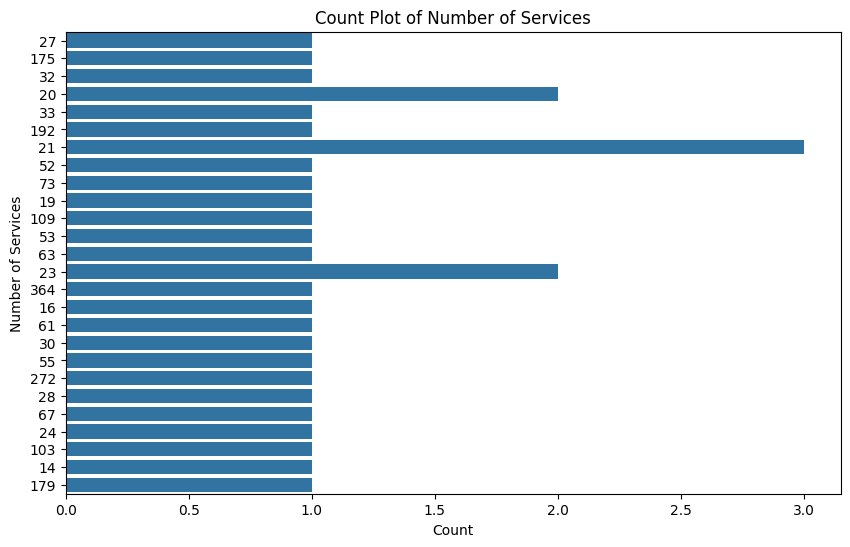

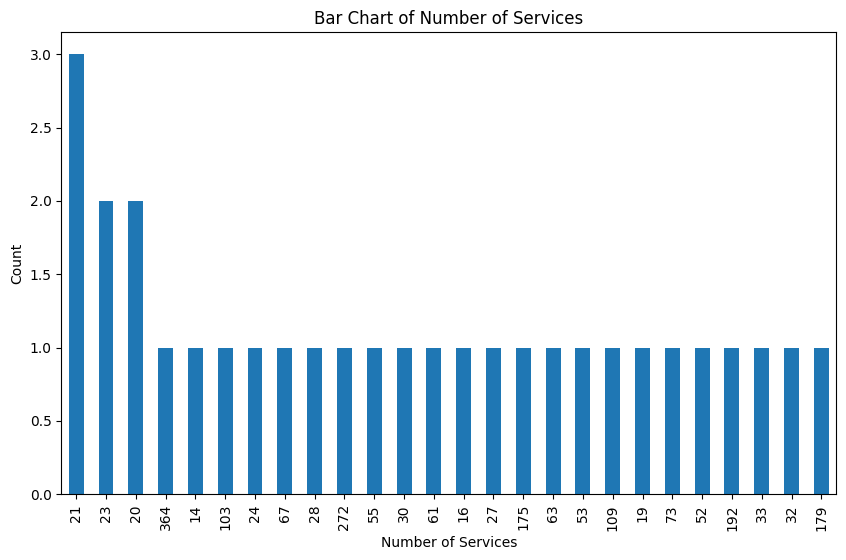

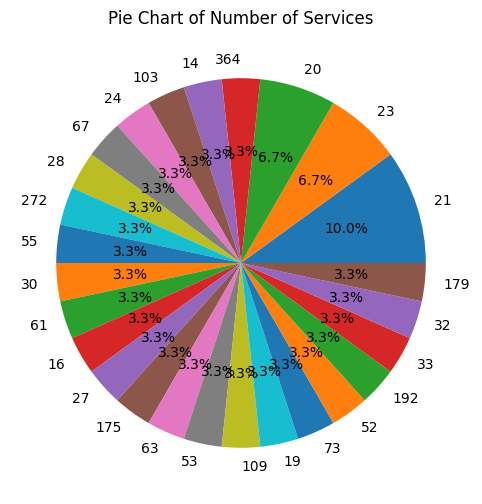

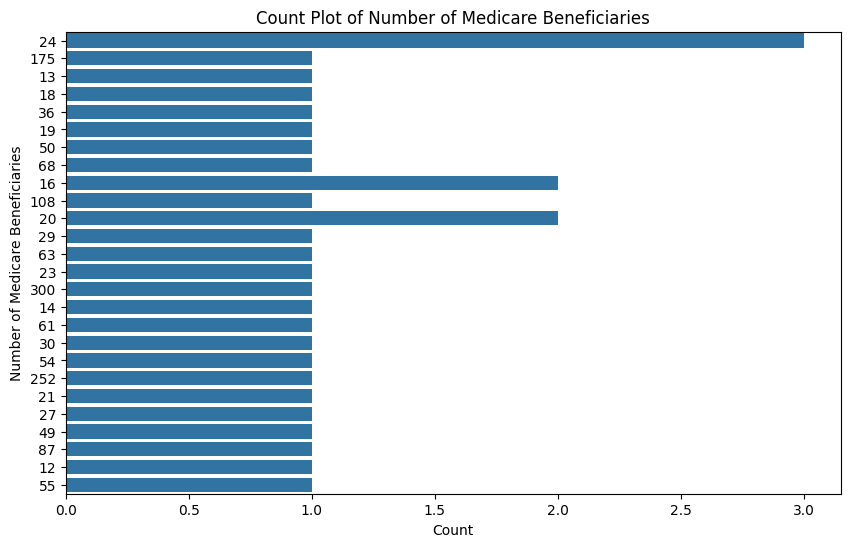

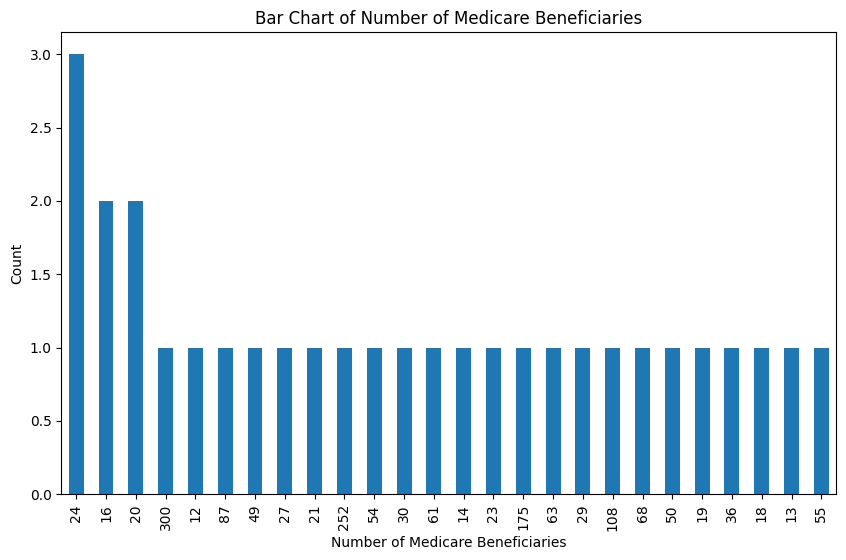

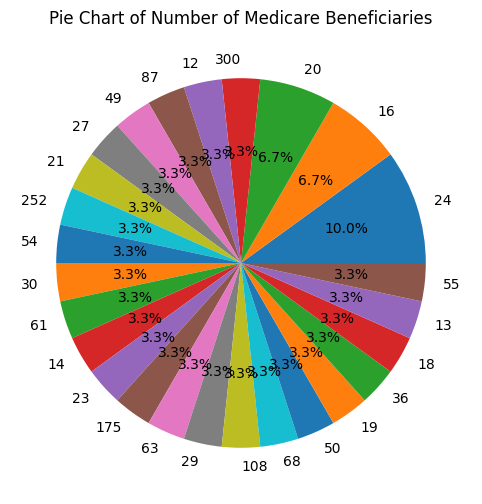

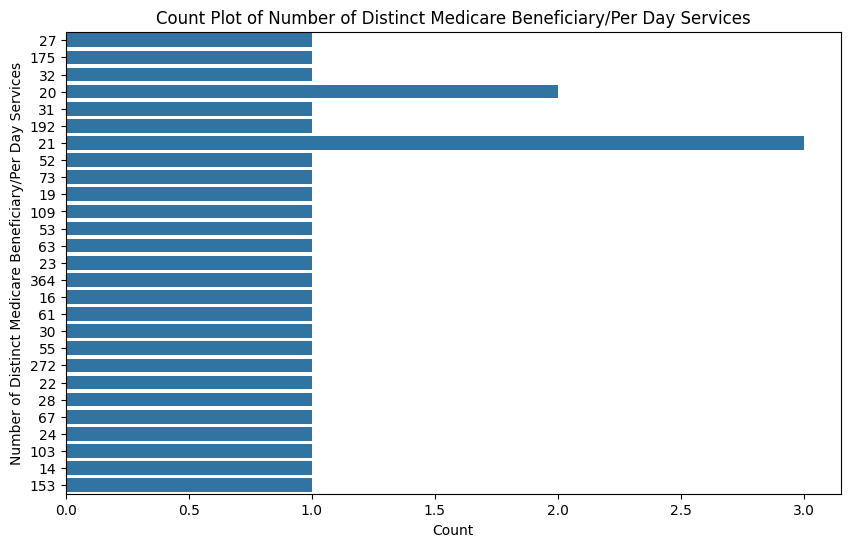

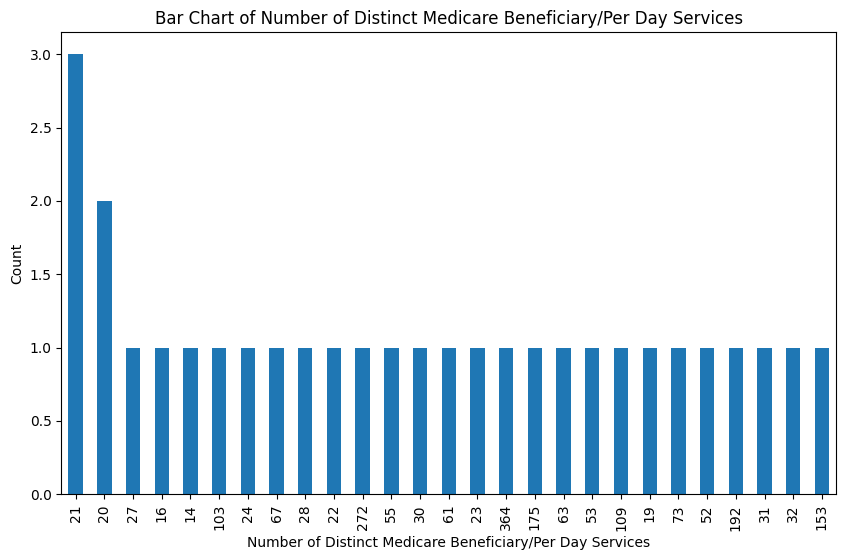

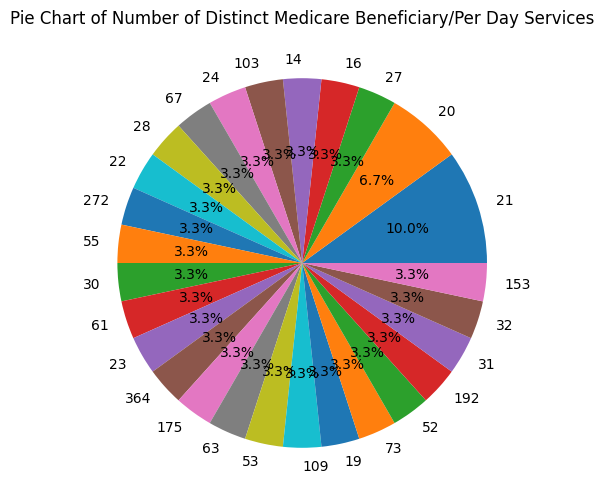

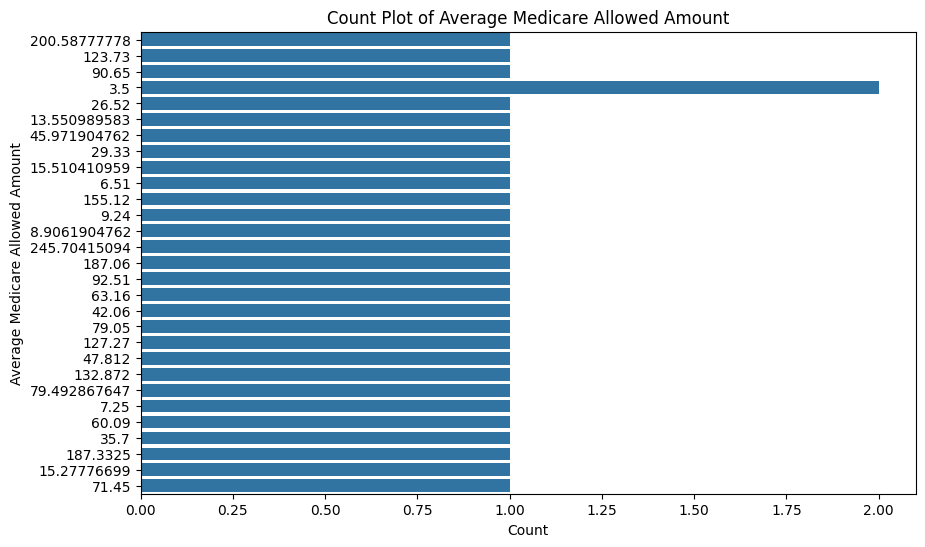

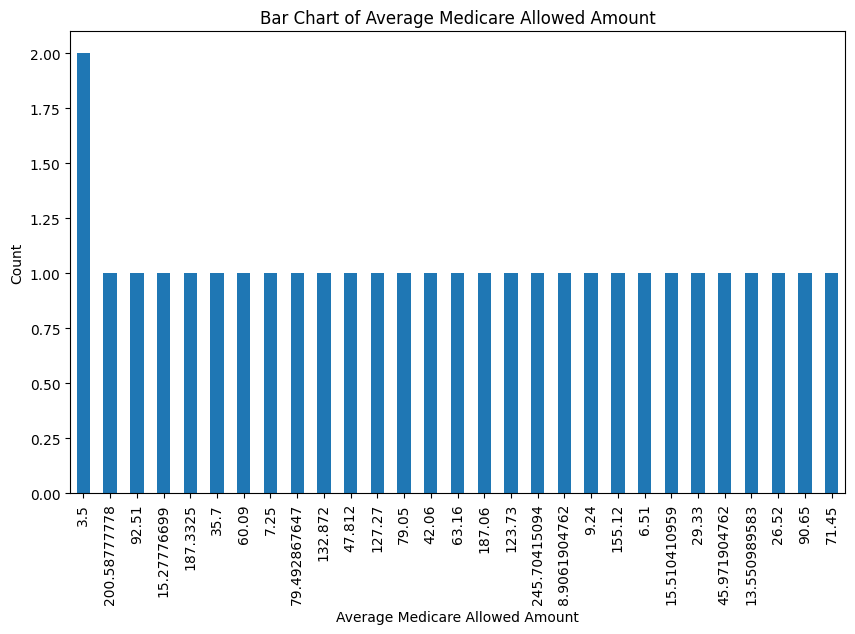

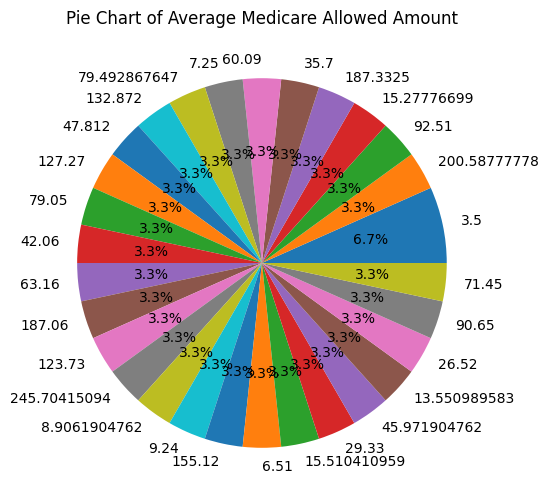

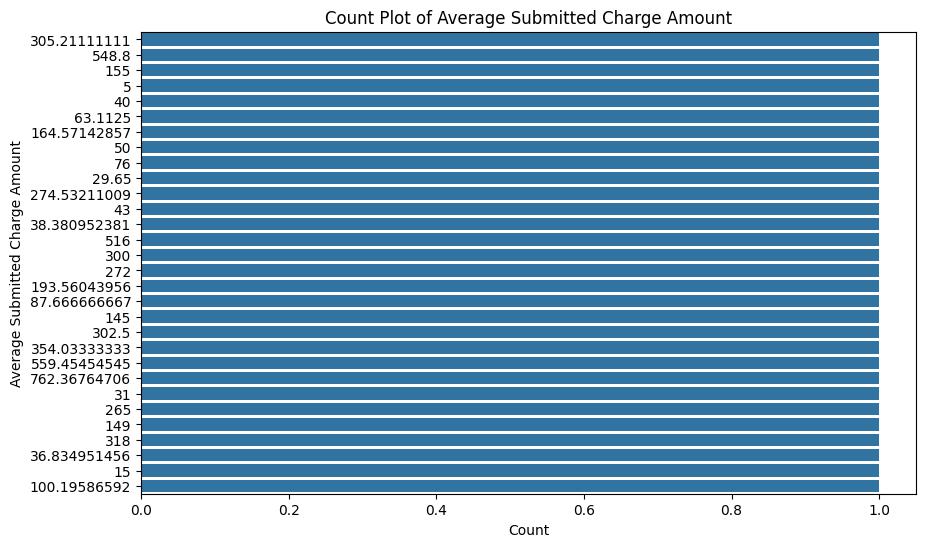

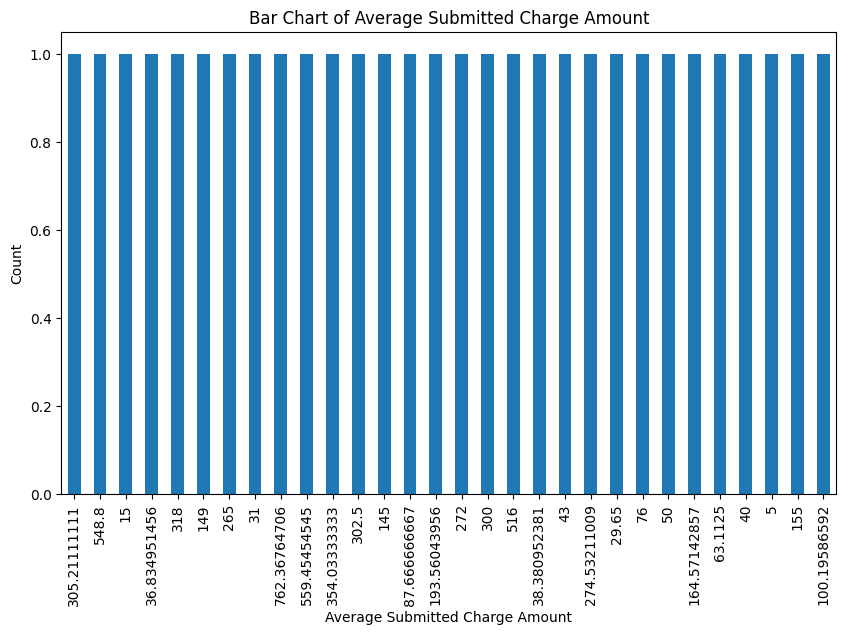

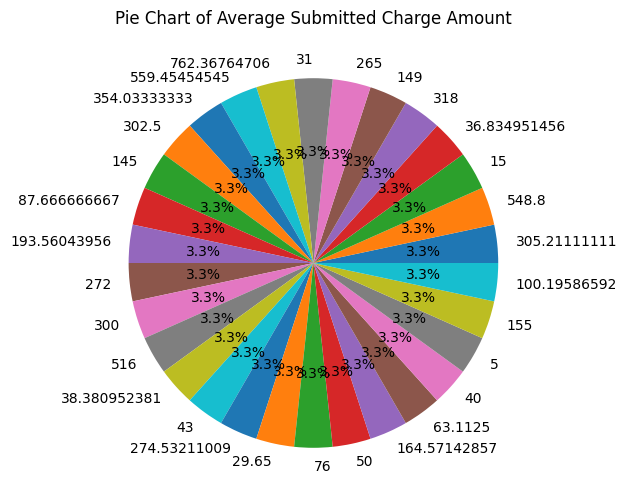

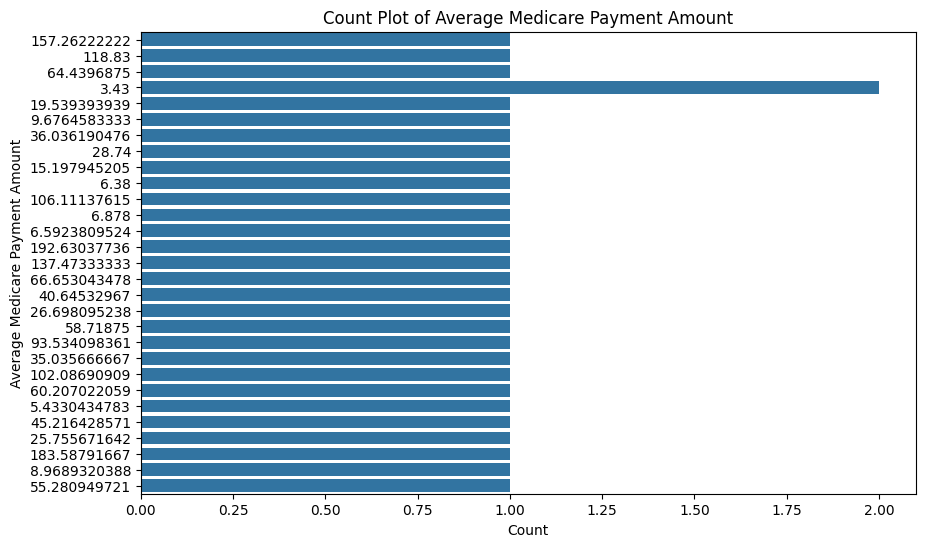

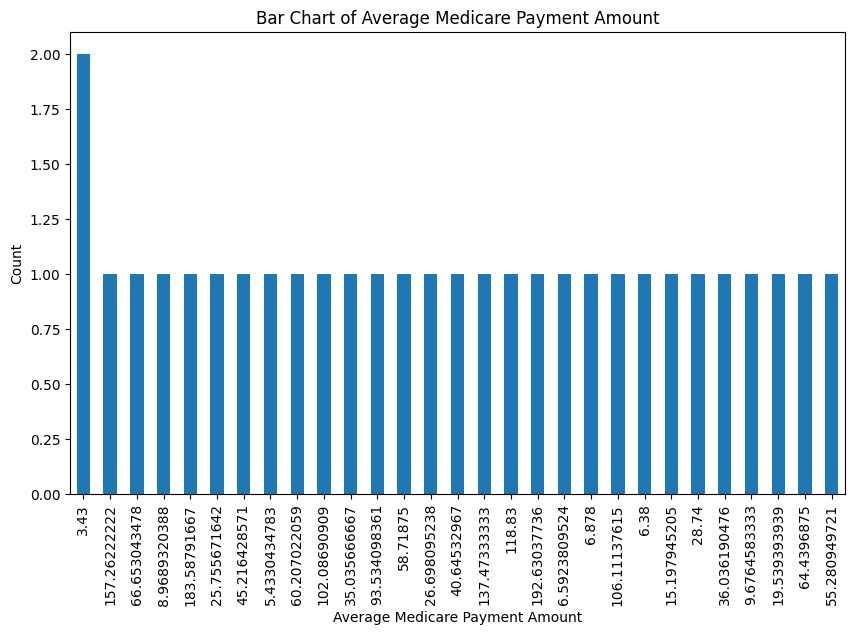

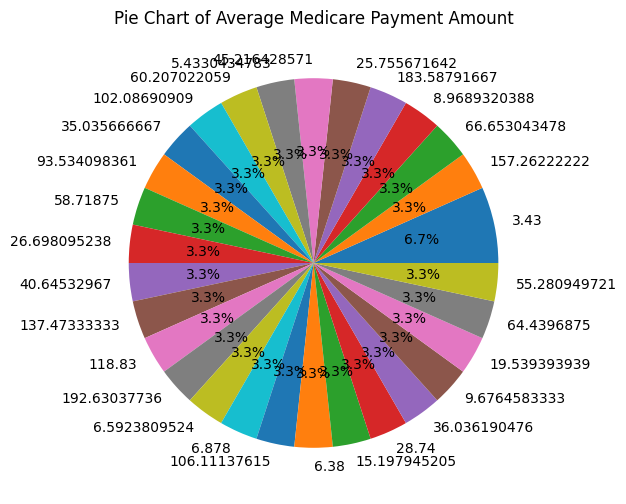

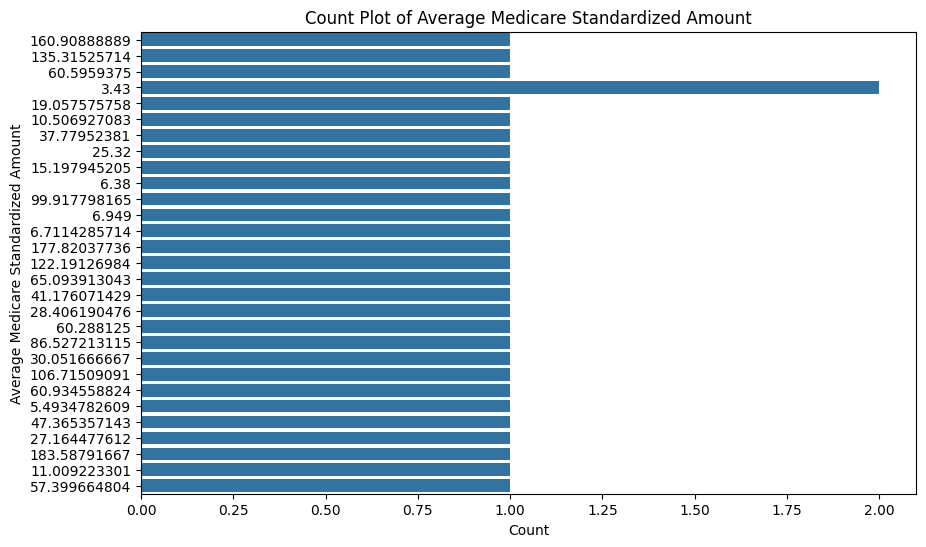

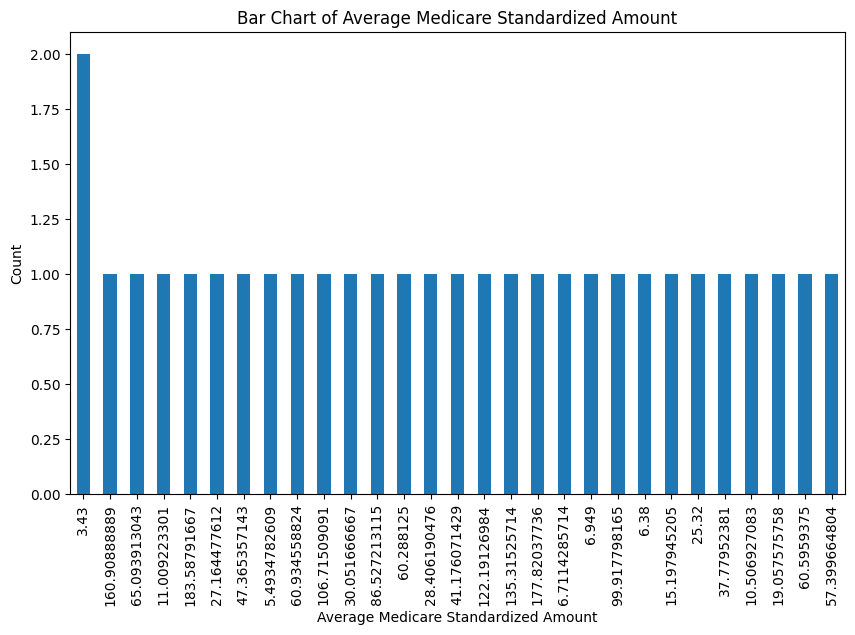

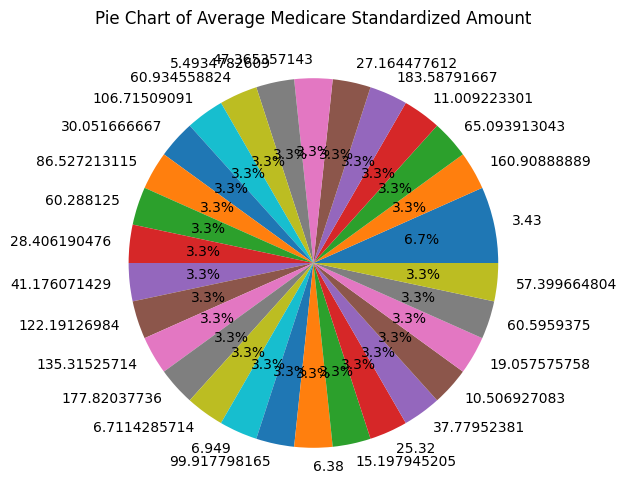

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 30 rows
selected_df = df.head(30)

# Identify categorical columns
categorical_columns = selected_df.select_dtypes(include=['object']).columns

# Plot the visualizations for the selected categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=selected_df[column])
    plt.title('Count Plot of ' + column)
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

    plt.figure(figsize=(10, 6))
    selected_df[column].value_counts().plot(kind='bar')
    plt.title('Bar Chart of ' + column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(10, 6))
    selected_df[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Pie Chart of ' + column)
    plt.ylabel('')
    plt.show()

BIVARIATE ANALYSIS :scatter plot and pair plot  for gender ,state code ,national provider and zip code

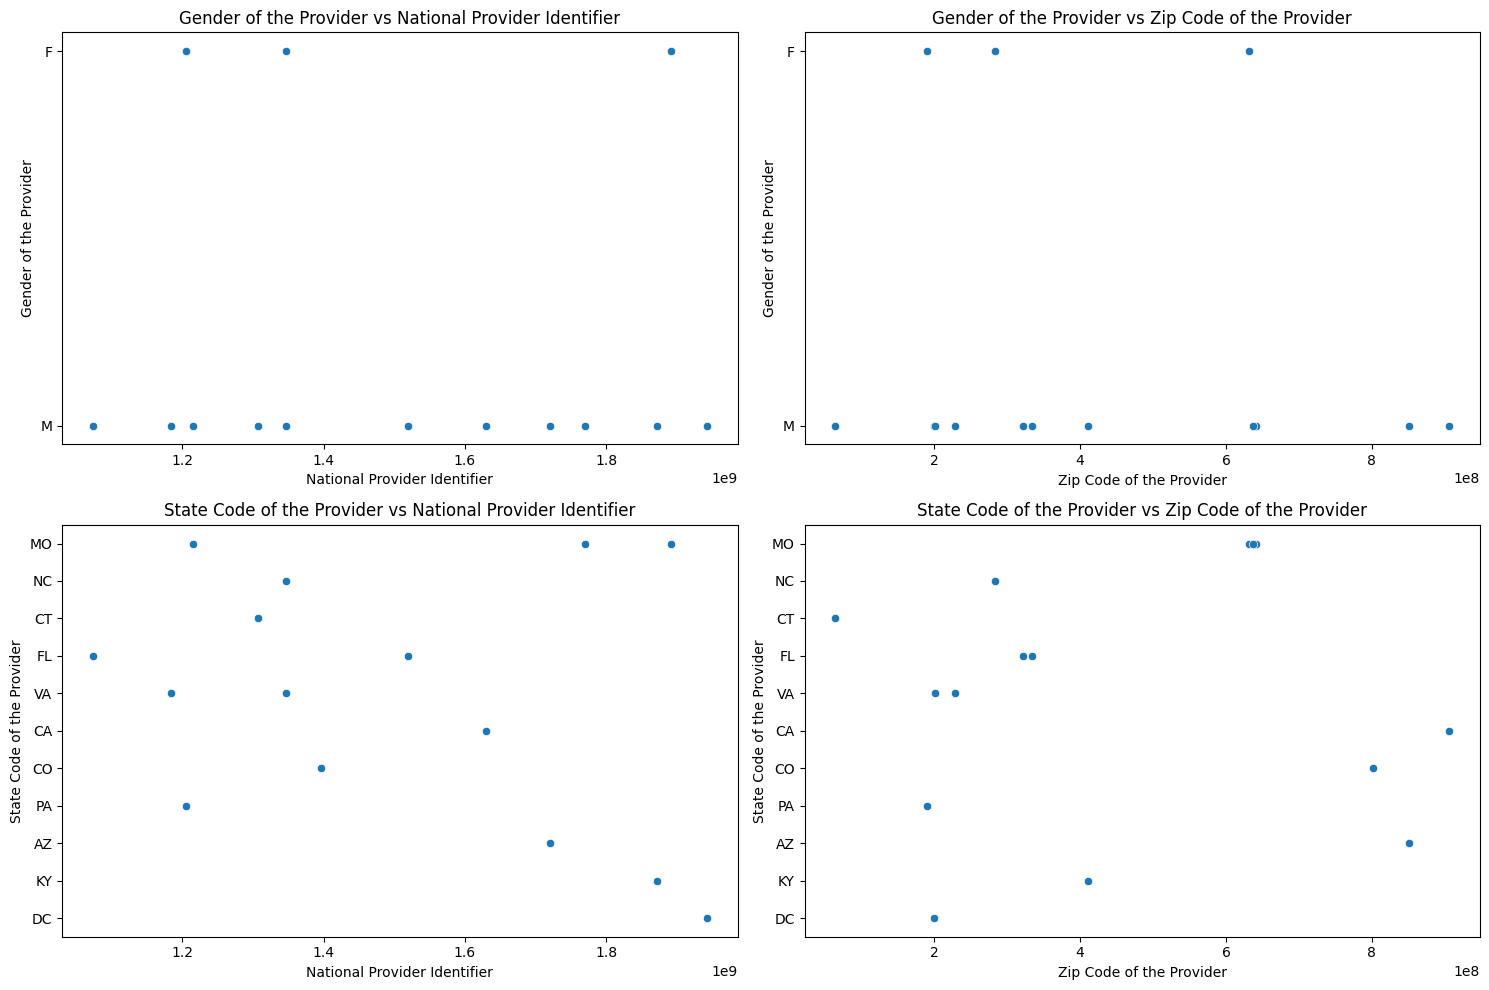

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top 15 rows
subset_df = df.head(15)

# Select two categorical and two numerical columns
cat_cols = ['Gender of the Provider', 'State Code of the Provider']
num_cols = ['National Provider Identifier', 'Zip Code of the Provider']

# Plot correlation graphs
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, cat_col in enumerate(cat_cols):
    for j, num_col in enumerate(num_cols):
        sns.scatterplot(data=subset_df, x=num_col, y=cat_col, ax=axes[i, j])
        axes[i, j].set_title(cat_col + ' vs ' + num_col)

plt.tight_layout()
plt.show()

this is the scatter plots between
gender of the provider ,national provider identifier,zip code of the provider,state code of the provider

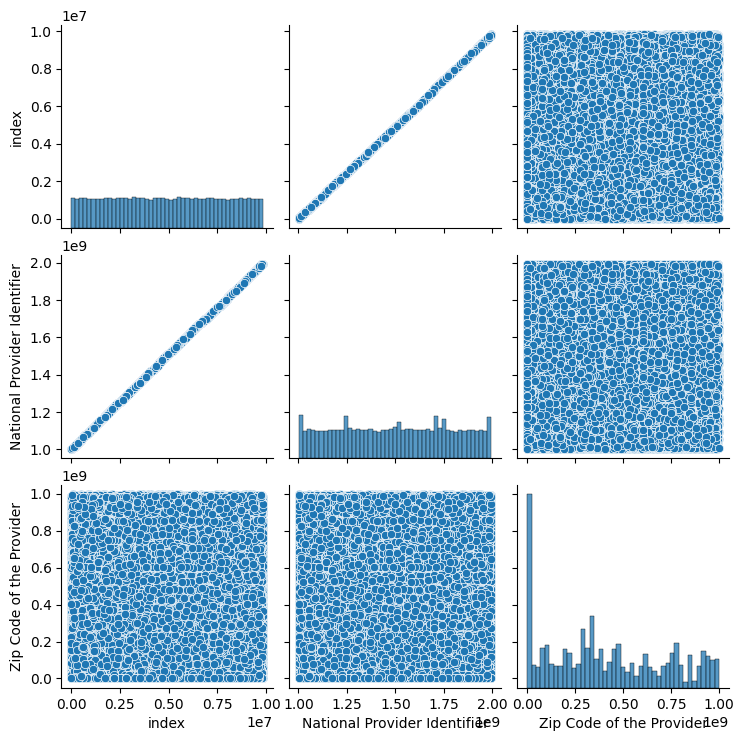

In [9]:
# Creating pair plots for all numerical variables in the dataframe
df_numerical = df.select_dtypes(include=['number'])

# Creating pair plots
sns.pairplot(df_numerical)
plt.show()

 these are the pair plots for all numerical variables in the dataframe variables are
 index ,national provider,zip code of the provider

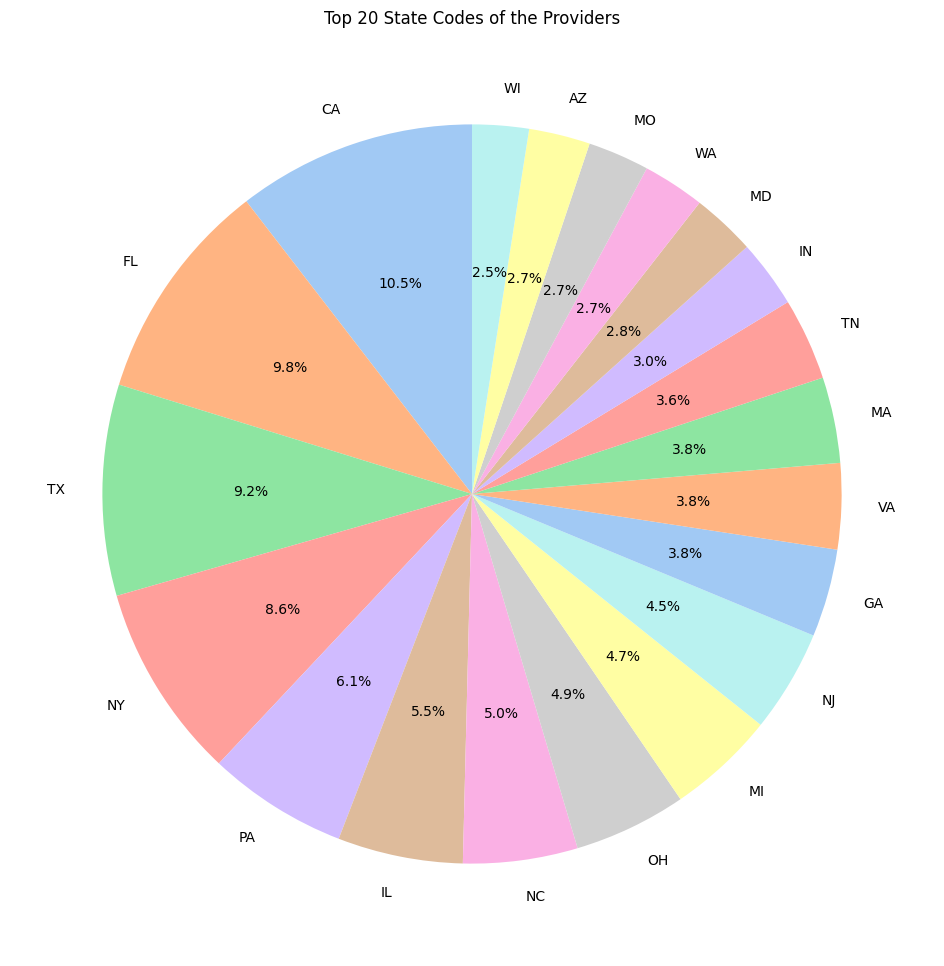

In [10]:
# Plotting a pie chart for the top 20 'State Code of the Provider'
top_20_states = df['State Code of the Provider'].value_counts().head(20)

plt.figure(figsize=(12, 12))
top_20_states.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 20 State Codes of the Providers')
plt.ylabel('')  # Hide the y-label
plt.show()

 OBSERVATION :in this pie chart "cA" state code provider has most percentage "10.5%"and the least has WI of 2.5%

 stacked bar chart and grouped bar chart for the "Country Code of the Provider" and "State Code of the Provider" variables.

<Figure size 1000x600 with 0 Axes>

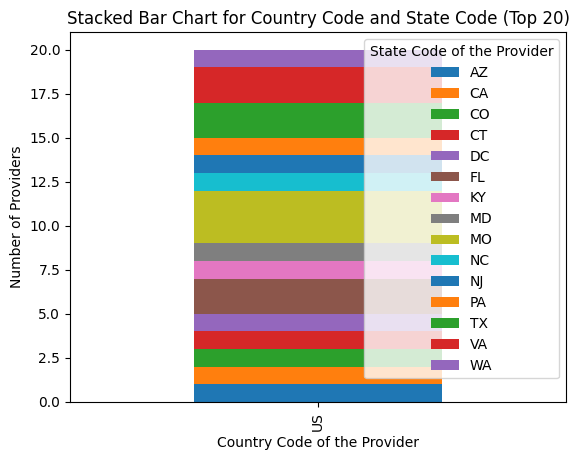

In [13]:
# prompt: create a staked bar chart for country code of the provider and state code of the provider  for 20 rows

import pandas as pd
import matplotlib.pyplot as plt

# Select the top 20 rows
df_top20 = df.head(20)

# Group the data by 'Country Code of the Provider' and 'State Code of the Provider'
grouped_data = df_top20.groupby(['Country Code of the Provider', 'State Code of the Provider']).size().unstack()

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Country Code and State Code (Top 20)')
plt.xlabel('Country Code of the Provider')
plt.ylabel('Number of Providers')
plt.show()


 OBSERVATION:in this staked graph "DC" country code is top and "az" state code provider is the top which has 20 number of providers

<Figure size 1000x600 with 0 Axes>

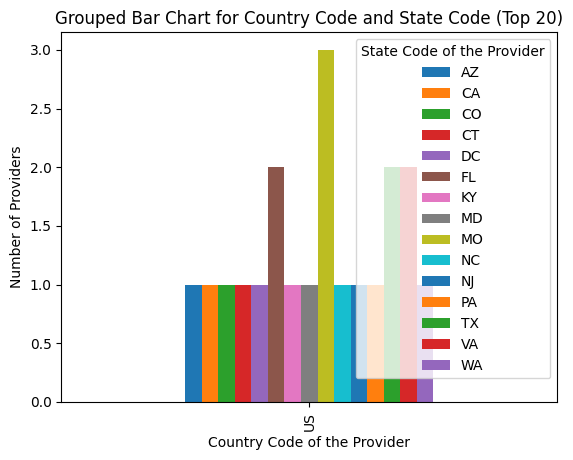

In [14]:
# prompt: create a grouped bar chart for country code of the provider and state code of the provider  for 20 rows

# Select the top 20 rows
df_top20 = df.head(20)

# Group the data by 'Country Code of the Provider' and 'State Code of the Provider'
grouped_data = df_top20.groupby(['Country Code of the Provider', 'State Code of the Provider']).size().unstack()

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.title('Grouped Bar Chart for Country Code and State Code (Top 20)')
plt.xlabel('Country Code of the Provider')
plt.ylabel('Number of Providers')
plt.show()


OBSERVATION:
for the country code of the provider "MO" and "FL" has large number of providers
for the rest of the countries has same 1.0 number of providers